# Problem Description and Governing Equations

For this project, one considers a two-dimensional linear elasticity problem on a trapezoidal domain $\Omega\subset\mathbb{R}^{2}$ bounded by the line segments joining the nodes (0,0), (2, 0.5), (2,1) and (0,1). the domain $\Omega$ consist of a homogeneous, isotropic medium with Young's modulus $E = 44.0$ MPa, Poisson's ratio $\nu = 0.37$ and out-of-plane thickness $t = 0.08$ m. External body forces, like the gravitational force, are neglected for this problem.

The domain boundary, $\partial\Omega$, is segmented into four regions: 
    * $\Gamma_{F}$, corresponding to the free boundaries;
    * $\Gamma_{D}$ corresponding to a Dirichlet condition prescribed to the leftmost edge; 
    * $\Gamma_{\mathbf{t}_{1}}$ corresponding to a von Neumann (traction) $\mathbf{t}_{1} = (146.0, 260.0)$ kPa applied between the points (0.8, 1) and (2, 1) along the upper edge;
    * $\Gamma_{\mathbf{t}_{2}}$ corresponding to a von Neumann (traction) $\mathbf{t}_{2} = (1900.0, 0.0)$ kPa acting along the rightmost edge. 

The domain with imposed boundary conditions can be seen in the diagram below. Here, red and blue represent $\Gamma_{\mathbf{t}_{1}}$ and $\Gamma_{\mathbf{t}_{2}}$ respectively, while the grey hash represents $\Gamma_{D}$. This image was taken from the problem outline provided by Dr. Hudson as part of the coursework specification.

![Image of the trapezoidal domain with annotations](<attachment:Screenshot 2025-03-26 at 03.12.28.png>)

The aim of the code below is to solve a discretised weak form of the full 'strong' PDE governing the displacement field $\mathbf{u}(x,y)$. From this, one can derive approximate forms for the stress and strain fields. In order to discretise the problem into a computationally tractable form, one must first define the strong form of the problem. The approach involves formulating the strong form of the governing equations and then deriving a corresponding weak form suitable for finite element approximation.

### **Strong Form**
Considering the system subject to some external body force $\bold{f}$, one recalls the principle of conservation of linear momentum; the divergence of the Cauchy stress tensor $\mathbf{S}$ on $\Omega$ must balance the applied body forces:
$$\boldsymbol{\nabla}\cdot\mathbf{S} + \bold{f} = 0, \quad \text{in } \Omega.$$

The Cauchy stress tensor is related to the infinitesimal strain by the constitutive law of linear elasticity: $\bold{S} = \boldsymbol{\mathbb{C}} : \boldsymbol{\varepsilon}(\mathbf{u})$. Here $\boldsymbol{\varepsilon}(\mathbf{u}) = \frac{1}{2}(\nabla\cdot\mathbf{u} + \nabla\cdot\mathbf{u}^T)$ is the infinitesimal strain tensor and $\boldsymbol{\mathbb{C}}$ is the rank-four elasticity tensor. For an isotropic material, $\boldsymbol{\mathbb{C}}$ is defined by the Young’s modulus $E$ and Poisson’s ratio $\nu$, and yields a symmetric stress tensor $\boldsymbol{S}$. Since the underlying system is sufficiently thin in the $\mathbf{e}_{3}$-direction, it follows that one can apply the plane stress approximation, reducing the constitutive law (in Voight notation) to:

$$\left[\begin{matrix} S_{11} \\ S_{22} \\ S_{12}\end{matrix}\right] = \frac{E}{1 - \nu^{2}}\left[ \begin{matrix} 1-\nu & \nu & 0 \\ \nu & 1-\nu & 0 \\ 0 & 0 & \frac{1-\nu}{2}\end{matrix} \right]\left[\begin{matrix}\varepsilon_{11} \\ \varepsilon_{22} \\ 2\varepsilon_{12} \end{matrix} \right], $$
where 
$$\mathbf{C} = \frac{E}{1 - \nu^{2}}\left[ \begin{matrix} 1-\nu & \nu & 0 \\ \nu & 1-\nu & 0 \\ 0 & 0 & \frac{1-\nu}{2}\end{matrix} \right].$$

Additionally, the prescribed Dirichlet and Von Neumann conditions impose additional constraints on our system:
$$ \mathbf{u} = \mathbf{0} \quad \text{on } \Gamma_{D}, \qquad \mathbf{S}\mathbf{n} = \mathbf{t}_{1} \quad \text{on } \Gamma_{\mathbf{t}_{1}},\qquad \mathbf{S}\mathbf{n} = \mathbf{t}_{2} \quad \text{on } \Gamma_{\mathbf{t}_{2}}.$$

Thus, the full strong form is:

$$\boldsymbol{\nabla}\cdot\mathbf{S} + \mathbf{f} = 0 \quad \text{in } \Omega,$$
$$ \mathbf{u} = \mathbf{0} \quad \text{on } \Gamma_{D},$$
$$ \mathbf{S}\mathbf{n} = \mathbf{t}_{1} \quad \text{on } \Gamma_{\mathbf{t}_{1}},$$
$$ \mathbf{S}\mathbf{n} = \mathbf{t}_{2} \quad \text{on } \Gamma_{\mathbf{t}_{2}}.$$

### **Weak Form**

Although the physics of the system can be easily expressed mathematically via the strong form of the PDE, one cannot necessarily solve the full PDE for a system of interest. Hence, one requires some numerical scheme to approximate the full solutions in order to make any progress in understanding the system of interest. To formulate such a system, one first multiplies the momentum conservation equation by an arbitrary test function $\bold{w}$ and integrates over the domain $\Omega$, yielding:
$$ -\int_{\Omega}\mathbf{f}\cdot\mathbf{w}dA = \int_{\Omega}(\nabla\cdot\bold{S})\cdot\bold{w}dA.$$

Applying the divergence theorem and integrating by parts yields the weak force balance equation in two-dimensions:

$$\int_{\Omega}\mathbf{S}:\nabla\mathbf{w}dA = \int_{\Omega}\mathbf{f}\cdot\mathbf{w}dA + \int_{\partial\Omega}\mathbf{w}\cdot(\bold{S}\bold{n})d\ell.$$

Due to the inherent symmetry of the stress tensor, one notes that the corresponding bilinear form must be symmetric, and thus the weak form simplifies to

$$\int_{\Omega}\mathbf{S}:\nabla\mathbf{\varepsilon}(\bold{w})dA = \int_{\Omega}\mathbf{f}\cdot\mathbf{w}dA + \int_{\Gamma_{N}}\mathbf{t}\cdot\bold{w}d\ell,$$

where $\Gamma_{N}$ represents the sections of $\partial\Omega$ subject to von Neumann boundary conditions. Here, this relation must hold for all test functions $\mathbf{w}$. 

This weak form forms the foundations for the Galerkin finite element method.


### **Discretisation & Galerkin Approximation**

To solve the weak form numerically, one typically approximates the weak solution to some arbitrary accuracy using a finite-dimensional subset of the full Sobolev space. This subspace is spanned by some finite basis of 'shape functions' $N_{i}$ that is typically associated to a mesh over the domain of interest.

$\Omega$ is partitioned into a finite number of small, non-overlapping elements (typically either triangles or quadrilaterals in two-dimensions). The collection of elements (the mesh) provides a framework on which we approximate $\mathbf{u}$. In this code, a full workflow for a triangular-mesh based approach is provided, with an additional workflow for a quadrilateral mesh and support for additional specialised meshing routines, although only the triangular mesh is used for the results section below.

For each mesh, an appropriate basis is selected. Typically Lagrange finite elements are selected, with first-order Lagrange finite elements used for both the triangular and quadrilateral meshes. 

Selecting test functions from the space spanned by the shape functions, namely the Galerkin method, one can discretise both the displacement and test functions as weighted linear combinations of the shape functions:

$$\mathbf{u}^{h} = \sum_{i=1}^{M}\mathbf{d}_{i}N_{i}$$
$$\mathbf{w}^{h} = \sum_{i=1}^{M}\mathbf{w}_{i}N_{i}$$

Therefore, upon substitution into the weak form outlined above, one obtains a finite system of linear equations for the coefficients $d_i$. The resulting system can be written succinctly as a tensor equation $\mathbf{K}\mathbf{d} = \mathbf{F}$ for 'global' stiffness matrix $\mathbf{K}$, a positive-definite symmetric matrix, and a 'global' force vector $\mathbf{F}$. 

The entries of $\mathbf{K}$ and $\mathbf{F}$ are given by:

$$ \mathbf{K}_{ij} = \int_{\Omega}\mathbf{S}:\boldsymbol{\varepsilon}dA \approx \sum_{\mathcal{E}\subset\Omega}\int_{\mathcal{E}}\mathbf{B}^{T}_{i}\mathbf{C} $$

Here, $\mathcal{B}$ denotes the derivatives of the shape functions with respect to the parameters parameterising the element.

$$ \mathbf{F} =  \int_{\Omega}\mathbf{f}\cdot\mathbf{w}dA + \int_{\partial\Omega}\mathbf{w}\cdot(\bold{S}\bold{n})d\ell. $$

To assess the aforementioned integrals one requires some form of numerical integration (typically quadrature) since the integrals may not necessarily have closed-form solutions. The code resorts to using Dunavant quadrature for triangles and Gauss-Legendre quadrature for quadrilaterals to evcaluate the relevant integrals within the code to the required accuracy. By using quadrature, we approximate the integrals as sums of the integrand evaluated at specific points times pre-determined weights. This method is both efficient and sufficiently accurate for polynomial shape functions.

### **Solving & Applying Boundary Conditions**

After assembly, one imposes Dirichlet boundary conditions by enforcing $\mathbf{u}=\mathbf{0}$ on $\Gamma_D$ by altering the system $K \mathbf{d} = \mathbf{F}$. In practice, for each prescribed displacement degree of freedom, we modify $K$ and $\mathbf{F}$ so that the equation for that DOF simply reads $d_i =  0$. This involves setting the corresponding row and column of $K$ to zero (except the diagonal entry set to 1) and adjusting $\mathbf{F}$. This procedure maintains the symmetry of $K$ and ensures the solution will contain the correct imposed value at that node. Von Neumann conditions, on the other hand, have already been incorporated into $\mathbf{F}$ during assembly via the surface integrals.

Once the linear system is fully assembled and modified for boundary conditions, the system is solved for $\mathbf{d}$. In this notebook, this is done using a direct solving routine. The result is the approximate displacement field $\mathbf{u}_h$ defined at the nodes. From these nodal values, one can interpolate or extrapolate to get displacement anywhere in an element, and thus can compute strains and stresses in each element by applying the constitutive law to the displacement gradients. The infinitesimal strain $\boldsymbol{\varepsilon}$ is obtained by applying the gradient operator (via strain-displacement matrix $\mathbf{B}$) to the nodal displacements of each element. The stress follows from applying the elasticity tensor to $\boldsymbol{\varepsilon}$.

### **Adaptive Refinement**
A core feature of this implementation is the ability to perform adaptive mesh refinement. The aim is to refine elements with large error estimations when compares to an ultra-fine mesh. This mesh is first defined and solved, and used to represent the 'true' solution to the fields of interest within the full Sobolev solution space. A second coarse mesh is then defined for the domain, and is recursively solved, using a finer and finer mesh, until some error threshold is reached. This implementation uses a mean relative stress error to identify elements requiring refinement. Each element tagged for refinement is subdivided into three new triangles, using the element centroid as a new node. The new nodes are collated, and a new mesh is generated using Delaunay refinement.

One implicitly assumes that the repeated refinement of the coarse grid will cause the the discrete solution $\mathbf{u}^{h}$ to converge to the reference solution within the finite subspace. By comparing to a reference solution that is presumably very close to the true solution, the code can adaptively focus refinements where the current mesh is inadequate.

### **Code Structure**

The code is organised in an object-oriented manner with several classes, each responsible for a specific aspect of the finite element solver. This modular design improves clarity and extensibility, making it easier to modify or upgrade individual components without affecting others. Below is a brief description of each major class and its role:
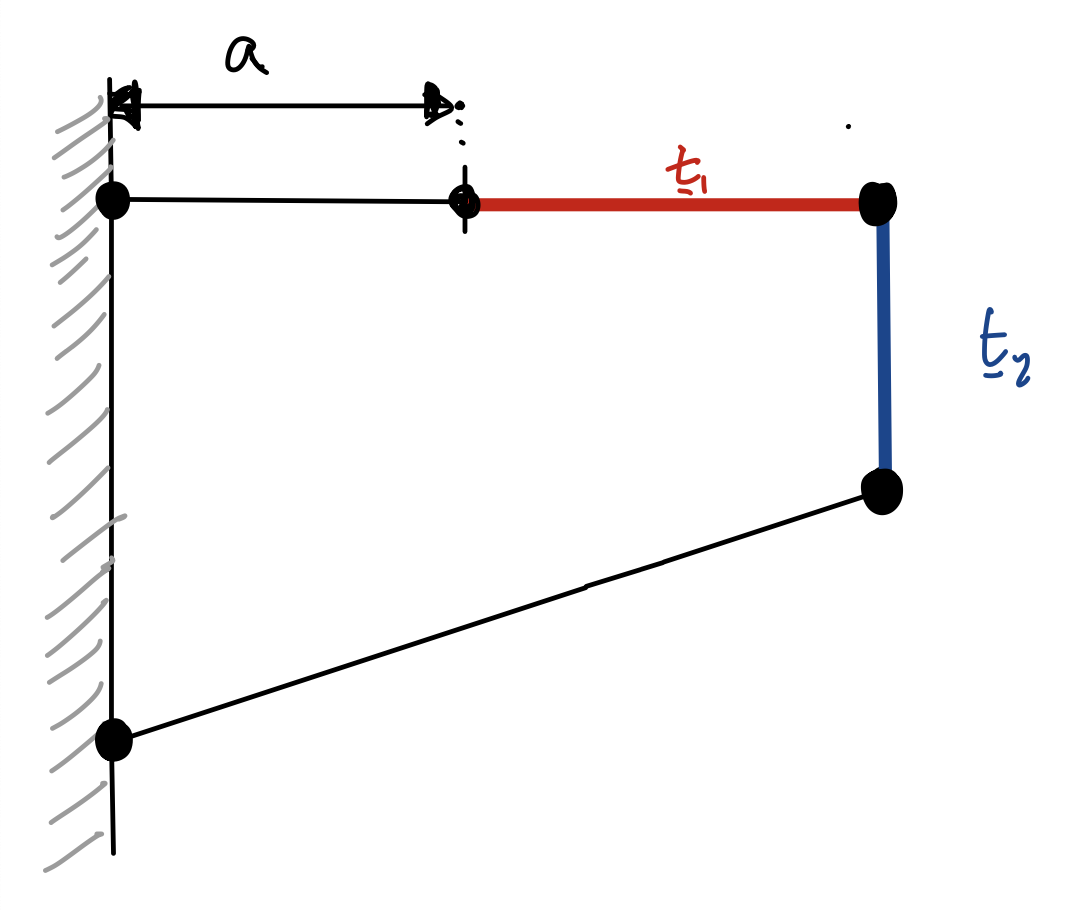

In [1]:
# Key Libraries
import abc # Used to create abstract base classes
import logging # Used to log messages

import matplotlib.pyplot as plt
import matplotlib.tri as tri
import meshpy.triangle as mp # Used to generate triangular meshes
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla

from scipy.spatial import cKDTree # Used to create a KDTree for nearest neighbour searches
from numpy.polynomial.legendre import leggauss

In [2]:
# Configure data logging
logging.basicConfig(level=logging.INFO, format="%(levelname)s: %(message)s")  

#### **Domain Class**

The Domain class encapsulates the definition of the physical domain geometry and its boundary segments. It is designed to be expanded to hold more complicated domain data if the code is expanded.

In [3]:
class Domain:
    """
        Container for 2D domain geometry.

        Args:
            vertices (np.ndarray): Array of shape (n, 2) listing the (x,y) coordinates
                of domain vertices in (roughly) CCW or CW order.
            edges (np.ndarray): Array of shape (m, 2) listing which vertex pairs form
                boundary segments. Each row [i, j] means there's a segment from
                vertices[i] to vertices[j].

        Note:
            - The domain is assumed to be a closed polygon.
            - The user is responsible for ensuring the domain is valid for meshing.
        """
    
    def __init__(self, vertices, edges):
        """
        Args:
        
            vertices: NumPy array of shape (n, 2)
            edges: NumPy array of shape (m, 2) with indices into vertices
        """
        
        self.vertices = vertices
        self.edges = edges


#### **GaussLegendreQuad Class**

The `GaussLegendreQuad` class was designed to act as a wrapper for the points and weights returned from the numpy `leggauss` function. This enables the passing of the quadrature points and weights in a similar manner to the `Dunavant` class, and thus the flexibility of the `FiniteElement` class.

An expansion of this class to contain routines to call the `leggauss` routine could be implemented in the future to improve the workflow, but has been omitted (for the sake of my sanity).

In [4]:
class GaussLegendreQuad:
    """
    Simple container for 2D Gauss-Legendre product quadrature data. 
    """
    
    def __init__(self, points, weights):
        """
        Args:
            points      : np.ndarray, quadrature points, shape (N, 2).
            weights     : np.ndarray, quadrature weights, shape (N,).
            
        """
        self.points = points
        self.weights = weights

#### **Dunavant Class**

The Dunavant class provides an implementation of the well-known Dunavant quadrature rules for integrating functions over a reference triangle (usually defined in barycentric coordinates). These rules, introduced by David Dunavant in his classic 1985 paper, are especially popular in finite element calculations involving triangular elements because they offer exact integration for polynomials up to certain degrees, depending on the chosen rule.

In finite element analyses on triangular meshes, one often needs to perform numerical integration of various quantities—such as the products of shape-function derivatives or stress/strain fields—over each triangular element. Dunavant quadrature provides a systematic way to choose quadrature points and weights in order to integrate polynomials exactly up to a given degree. This is vital for ensuring that element stiffness matrices and load vectors are computed accurately, thereby improving the overall precision and convergence of the method.

1.	**Rule Selection and Polynomial Degree:**

    The constructor (__init__) accepts a single integer, rule, which can range from 1 to 20. Each integer corresponds to a specific Dunavant scheme with a particular number of integration points (and associated weights), guaranteeing polynomial exactness up to the rule’s degree. Internally, the class sets self.rule, self.degree, and self.order. The degree is simply the same as the rule number, whereas the order is determined by looking up how many quadrature points belong to that rule.

2.	**Suborder and Subrules:**

    The code employs compressed suborder data (_suborder) and subrule data (_subrules) for efficiency.Each rule maps to a tuple containing:
	* A list of barycentric coordinates (suborder_xyz).
	* A corresponding list of subrule weights (suborder_w).
	* The class method _compute_rule reconstructs the full set of quadrature points ((x, y)) and their corresponding weights by iterating over these compressed suborders and subrules.

3.	**Barycentric Coordinates:**
	The class interprets the quadrature points in barycentric coordinates. These are then mapped to (x, y) coordinates in the reference triangle. Because the reference triangle is usually taken to be (0, 0), (1, 0), (0, 1) in 2D, the points correspond to (xi, eta, 1 - xi - eta). In the _compute_rule method, the code carefully assembles these points from the compressed data, ensuring each subrule’s shape is correctly expanded into a final list of (x, y) points.

4.	**Error Checking and Validation:**
	At initialisation, the code checks if the rule lies between 1 and 20, raising an error if not. This ensures that the user does not attempt to request a quadrature scheme outside the valid range. If any mismatch arises between the suborder or subrules data, it similarly raises exceptions.

5.	**Usage in Finite Element Integration:**
	Once a Dunavant object is created, the user can access:

	* self.points: an array of shape (order, 2) storing the quadrature coordinates.

	* self.weights: an array of length order storing the quadrature weights.

Although the template for the class structure was originally written in C++  by John Burkardt, modifications were needed to convert this into a useable form for python. The full credit for this code should be with him and Dunavant.

In [5]:
class Dunavant:
    
    """
    A class that encapsulates the Dunavant quadrature rule for the reference triangle.
    Modified from C++ code by John Burkardt.
    
    Author : Gianluca Seaford
    Date   : 2021-03-16
    
    Reference:

        David Dunavant,
        High Degree Efficient Symmetrical Gaussian Quadrature Rules
        for the Triangle,
        International Journal for Numerical Methods in Engineering,
        Volume 21, 1985, pages 1129-1148.

        James Lyness, Dennis Jespersen,
        Moderate Degree Symmetric Quadrature Rules for the Triangle,
        Journal of the Institute of Mathematics and its Applications,
        Volume 15, Number 1, February 1975, pages 19-32.
        
        John Burkardt,
        triangle_dunavant_rule.cpp
        https://people.sc.fsu.edu/~jburkardt/cpp_src/triangle_dunavant_rule/triangle_dunavant_rule.html
        Accessed 2021-03-16.
        
    
    Attributes:
        rule      : integer, the chosen rule (from 1 to 20)
        degree    : polynomial degree of exactness (here taken equal to the rule number)
        order     : total number of quadrature points (computed from the suborder data)
        points    : NumPy array of shape (order, 2) with the quadrature points (in barycentric coordinates,
                    where we interpret the first two coordinates as the x and y of the point)
        weights   : NumPy array of length order containing the quadrature weights.
      
    """
    
    # Compressed suborder information
    _suborder = {
    1: [1],
    2: [3],
    3: [1, 3],
    4: [3, 3],
    5: [1, 3, 3],
    6: [3, 3, 6],
    7: [1, 3, 3, 6],
    8: [1, 3, 3, 3, 6],
    9: [1, 3, 3, 3, 3, 6],
    10: [1, 3, 3, 6, 6, 6],
    11: [3, 3, 3, 3, 3, 6, 6],
    12: [3, 3, 3, 3, 3, 6, 6, 6],
    13: [1, 3, 3, 3, 3, 3, 3, 6, 6, 6],
    14: [3, 3, 3, 3, 3, 3, 6, 6, 6, 6],
    15: [3, 3, 3, 3, 3, 3, 6, 6, 6, 6, 6],
    16: [1, 3, 3, 3, 3, 3, 3, 3, 6, 6, 6, 6, 6],
    17: [1, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 6, 6, 6, 6],
    18: [1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 6, 6, 6, 6, 6],
    19: [1, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 6, 6, 6, 6, 6, 6],
    20: [1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 6, 6, 6, 6, 6, 6]
    }
    # Compressed subrule data.
    # Each rule maps to a tuple (suborder_xyz, suborder_w), where:
    
    _subrules ={
        1: (
            [0.333333333333333, 0.333333333333333, 0.333333333333333],
            [1.000000000000000]
        ),
        2: (
            [0.666666666666667, 0.166666666666667, 0.166666666666667],
            [0.333333333333333]
        ),
        3: (
            [0.333333333333333, 0.333333333333333, 0.333333333333333,
             0.600000000000000, 0.200000000000000, 0.200000000000000],
            [-0.562500000000000, 0.520833333333333]
        ),
        4: (
            [0.108103018168070, 0.445948490915965, 0.445948490915965,
             0.816847572980459, 0.091576213509771, 0.091576213509771],
            [0.223381589678011, 0.109951743655322]
        ),
        5: (
            [0.333333333333333, 0.333333333333333, 0.333333333333333,
             0.059715871789770, 0.470142064105115, 0.470142064105115,
             0.797426985353087, 0.101286507323456, 0.101286507323456],
            [0.225000000000000, 0.132394152788506, 0.125939180544827]
        ),
        6: (
            [0.501426509658179, 0.249286745170910, 0.249286745170910,
             0.873821971016996, 0.063089014491502, 0.063089014491502,
             0.053145049844817, 0.310352451033784, 0.636502499121399],
            [0.116786275726379, 0.050844906370207, 0.082851075618374]
        ),
        7: (
            [0.333333333333333, 0.333333333333333, 0.333333333333333,
             0.479308067841920, 0.260345966079040, 0.260345966079040,
             0.869739794195568, 0.065130102902216, 0.065130102902216,
             0.048690315425316, 0.312865496004874, 0.638444188569810],
            [-0.149570044467682, 0.175615257433208, 0.053347235608838, 
             0.077113760890257]
        ),
        8: (
            [0.333333333333333, 0.333333333333333, 0.333333333333333,
             0.081414823414554, 0.459292588292723, 0.459292588292723,
             0.658861384496480, 0.170569307751760, 0.170569307751760,
             0.898905543365938, 0.050547228317031, 0.050547228317031,
             0.008394777409958, 0.263112829634638, 0.728492392955404],
            [0.144315607677787, 0.095091634267285, 0.103217370534718,
             0.032458497623198, 0.027230314174435]
        ),
        9: (
            [0.333333333333333, 0.333333333333333, 0.333333333333333,
             0.020634961602525, 0.489682519198738, 0.489682519198738,
             0.125820817014127, 0.437089591492937, 0.437089591492937,
             0.623592928761935, 0.188203535619033, 0.188203535619033,
             0.910540973211095, 0.044729513394453, 0.044729513394453,
             0.036838412054736, 0.221962989160766, 0.741198598784498],
            [0.097135796282799, 0.031334700227139, 0.077827541004774,
             0.079647738927210, 0.025577675658698, 0.043283539377289]
        ),
        10: (
            [0.333333333333333, 0.333333333333333, 0.333333333333333,
             0.028844733232685, 0.485577633383657, 0.485577633383657,
             0.781036849029926, 0.109481575485037, 0.109481575485037,
             0.141707219414880, 0.307939838764121, 0.550352941820999,
             0.025003534762686, 0.246672560639903, 0.728323904597411,
             0.009540815400299, 0.066803251012200, 0.923655933587500],
            [0.090817990382754, 0.036725957756467, 0.045321059435528,
             0.072757916845420, 0.028327242531057, 0.009421666963733]
        ),
        11: (
            [-0.069222096541517, 0.534611048270758, 0.534611048270758,
             0.202061394068290, 0.398969302965855, 0.398969302965855,
             0.593380199137435, 0.203309900431282, 0.203309900431282,
             0.761298175434837, 0.119350912282581, 0.119350912282581,
             0.935270103777448, 0.032364948111276, 0.032364948111276,
             0.050178138310495, 0.356620648261293, 0.593201213428213,
             0.021022016536166, 0.171488980304042, 0.807489003159792],
            [0.000927006328961, 0.077149534914813, 0.059322977380774,
             0.036184540503418, 0.013659731002678, 0.052337111962204,
             0.020707659639141]
        ),
        12: (
            [0.023565220452390, 0.488217389773805, 0.488217389773805,
             0.120551215411079, 0.439724392294460, 0.439724392294460,
             0.457579229975768, 0.271210385012116, 0.271210385012116,
             0.744847708916828, 0.127576145541586, 0.127576145541586,
             0.957365299093579, 0.021317350453210, 0.021317350453210,
             0.115343494534698, 0.275713269685514, 0.608943235779788,
             0.022838332222257, 0.281325580989940, 0.695836086787803,
             0.025734050548330, 0.116251915907597, 0.858014033544073],
            [0.025731066440455, 0.043692544538038, 0.062858224217885,
             0.034796112930709, 0.006166261051559, 0.040371557766381,
             0.022356773202303, 0.017316231108659]
        ),
        13: (
            [0.333333333333333, 0.333333333333333, 0.333333333333333,
             0.009903630120591, 0.495048184939705, 0.495048184939705,
             0.062566729780852, 0.468716635109574, 0.468716635109574,
             0.170957326397447, 0.414521336801277, 0.414521336801277,
             0.541200855914337, 0.229399572042831, 0.229399572042831,
             0.771151009607340, 0.114424495196330, 0.114424495196330,
             0.950377217273082, 0.024811391363459, 0.024811391363459,
             0.094853828379579, 0.268794997058761, 0.636351174561660,
             0.018100773278807, 0.291730066734288, 0.690169159986905,
             0.022233076674090, 0.126357385491669, 0.851409537834241],
            [0.052520923400802, 0.011280145209330, 0.031423518362454,
             0.047072502504194, 0.047363586536355, 0.031167529045794,
             0.007975771465074, 0.036848402728732, 0.017401463303822,
             0.015521786839045]
        ),
        14: (
            [0.022072179275643, 0.488963910362179, 0.488963910362179,
             0.164710561319092, 0.417644719340454, 0.417644719340454,
             0.453044943382323, 0.273477528308839, 0.273477528308839,
             0.645588935174913, 0.177205532412543, 0.177205532412543,
             0.876400233818255, 0.061799883090873, 0.061799883090873,
             0.961218077502598, 0.019390961248701, 0.019390961248701,
             0.057124757403648, 0.172266687821356, 0.770608554774996,
             0.092916249356972, 0.336861459796345, 0.570222290846683,
             0.014646950055654, 0.298372882136258, 0.686980167808088,
             0.001268330932872, 0.118974497696957, 0.879757171370171],
            [0.021883581369429, 0.032788353544125, 0.051774104507292,
             0.042162588736993, 0.014433699669777, 0.004923403602400,
             0.024665753212564, 0.038571510787061, 0.014436308113534,
             0.005010228838501]
        ),
        15: (
            [-0.013945833716486, 0.506972916858243, 0.506972916858243,
             0.137187291433955, 0.431406354283023, 0.431406354283023,
             0.444612710305711, 0.277693644847144, 0.277693644847144,
             0.747070217917492, 0.126464891041254, 0.126464891041254,
             0.858383228050628, 0.070808385974686, 0.070808385974686,
             0.962069659517853, 0.018965170241073, 0.018965170241073,
             0.133734161966621, 0.261311371140087, 0.604954466893291,
             0.036366677396917, 0.388046767090269, 0.575586555512814,
            -0.010174883126571, 0.285712220049916, 0.724462663076655,
             0.036843869875878, 0.215599664072284, 0.747556466051838,
             0.012459809331199, 0.103575616576386, 0.883964574092416],
            [0.001916875642849, 0.044249027271145, 0.051186548718852,
             0.023687735870688, 0.013289775690021, 0.004748916608192,
             0.038550072599593, 0.027215814320624, 0.002182077366797,
             0.021505319847731, 0.007673942631049]
        ),
        16: (
            [0.333333333333333, 0.333333333333333, 0.333333333333333,
             0.005238916103123, 0.497380541948438, 0.497380541948438,
             0.173061122901295, 0.413469438549352, 0.413469438549352,
             0.059082801866017, 0.470458599066991, 0.470458599066991,
             0.518892500060958, 0.240553749969521, 0.240553749969521,
             0.704068411554854, 0.147965794222573, 0.147965794222573,
             0.849069624685052, 0.075465187657474, 0.075465187657474,
             0.966807194753950, 0.016596402623025, 0.016596402623025,
             0.103575692245252, 0.296555596579887, 0.599868711174861,
             0.020083411655416, 0.337723063403079, 0.642193524941505,
            -0.004341002614139, 0.204748281642812, 0.799592720971327,
             0.041941786468010, 0.189358492130623, 0.768699721401368,
             0.014317320230681, 0.085283615682657, 0.900399064086661],
            [0.046875697427642, 0.006405878578585, 0.041710296739387,
             0.026891484250064, 0.042132522761650, 0.030000266842773,
             0.014200098925024, 0.003582462351273, 0.032773147460627,
             0.015298306248441, 0.002386244192839, 0.019084792755899,
             0.006850054546542]
        ),
        17: (
            [0.333333333333333, 0.333333333333333, 0.333333333333333,
             0.005658918886452, 0.497170540556774, 0.497170540556774,
             0.035647354750751, 0.482176322624625, 0.482176322624625,
             0.099520061958437, 0.450239969020782, 0.450239969020782,
             0.199467521245206, 0.400266239377397, 0.400266239377397,
             0.495717464058095, 0.252141267970953, 0.252141267970953,
             0.675905990683077, 0.162047004658461, 0.162047004658461,
             0.848248235478508, 0.075875882260746, 0.075875882260746,
             0.968690546064356, 0.015654726967822, 0.015654726967822,
             0.010186928826919, 0.334319867363658, 0.655493203809423,
             0.135440871671036, 0.292221537796944, 0.572337590532020,
             0.054423924290583, 0.319574885423190, 0.626001190286228,
             0.012868560833637, 0.190704224192292, 0.796427214974071,
             0.067165782413524, 0.180483211648746, 0.752351005937729,
             0.014663182224828, 0.080711313679564, 0.904625504095608],
            [0.033437199290803, 0.005093415440507, 0.014670864527638,
             0.024350878353672, 0.031107550868969, 0.031257111218620,
             0.024815654339665, 0.014056073070557, 0.003194676173779,
             0.008119655318993, 0.026805742283163, 0.018459993210822,
             0.008476868534328, 0.018292796770025, 0.006665632004165]
        ),
        18: (
            [0.333333333333333, 0.333333333333333, 0.333333333333333,
             0.013310382738157, 0.493344808630921, 0.493344808630921,
             0.061578811516086, 0.469210594241957, 0.469210594241957,
             0.127437208225989, 0.436281395887006, 0.436281395887006,
             0.210307658653168, 0.394846170673416, 0.394846170673416,
             0.500410862393686, 0.249794568803157, 0.249794568803157,
             0.677135612512315, 0.161432193743843, 0.161432193743843,
             0.846803545029257, 0.076598227485371, 0.076598227485371,
             0.951495121293100, 0.024252439353450, 0.024252439353450,
             0.913707265566071, 0.043146367216965, 0.043146367216965,
             0.008430536202420, 0.358911494940944, 0.632657968856636,
             0.131186551737188, 0.294402476751957, 0.574410971510855,
             0.050203151565675, 0.325017801641814, 0.624779046792512,
             0.066329263810916, 0.184737559666046, 0.748933176523037,
             0.011996194566236, 0.218796800013321, 0.769207005420443,
             0.014858100590125, 0.101179597136408, 0.883962302273467,
            -0.035222015287949, 0.020874755282586, 1.014347260005363],
            [0.030809939937647, 0.009072436679404, 0.018761316939594,
             0.019441097985477, 0.027753948610810, 0.032256225351457,
             0.025074032616922, 0.015271927971832, 0.006793922022963,
            -0.002223098729920, 0.006331914076406, 0.027257538049138,
             0.017676785649465, 0.018379484638070, 0.008104732808192,
             0.007634129070725, 0.000046187660794]
        ),
        19: (
            [0.333333333333333, 0.333333333333333, 0.333333333333333,
             0.020780025853987, 0.489609987073006, 0.489609987073006,
             0.090926214604215, 0.454536892697893, 0.454536892697893,
             0.197166638701138, 0.401416680649431, 0.401416680649431,
             0.488896691193805, 0.255551654403098, 0.255551654403098,
             0.645844115695741, 0.177077942152130, 0.177077942152130,
             0.779877893544096, 0.110061053227952, 0.110061053227952,
             0.888942751496321, 0.055528624251840, 0.055528624251840,
             0.974756272445543, 0.012621863777229, 0.012621863777229,
             0.003611417848412, 0.395754787356943, 0.600633794794645,
             0.134466754530780, 0.307929983880436, 0.557603261588784,
             0.014446025776115, 0.264566948406520, 0.720987025817365,
             0.046933578838178, 0.358539352205951, 0.594527068955871,
             0.002861120350567, 0.157807405968595, 0.839331473680839,
             0.223861424097916, 0.075050596975911, 0.701087978926173,
             0.034647074816760, 0.142421601113383, 0.822931324069857,
             0.010161119296278, 0.065494628082938, 0.924344252620784],
            [0.032906331388919, 0.010330731891272, 0.022387247263016,
             0.030266125869468, 0.030490967802198, 0.024159212741641,
             0.016050803586801, 0.008084580261784, 0.002079362027485,
             0.003884876904981, 0.025574160612022, 0.008880903573338,
             0.016124546761731, 0.002491941817491, 0.018242840118951,
             0.010258563736199, 0.003799928855302]
        ),
        20: (
            [0.333333333333333, 0.333333333333333, 0.333333333333333,
            -0.001900928704400, 0.500950464352200, 0.500950464352200,
             0.023574084130543, 0.488212957934729, 0.488212957934729,
             0.089726636099435, 0.455136681950283, 0.455136681950283,
             0.196007481363421, 0.401996259318289, 0.401996259318289,
             0.488214180481157, 0.255892909759421, 0.255892909759421,
             0.647023488009788, 0.176488255995106, 0.176488255995106,
             0.791658289326483, 0.104170855336758, 0.104170855336758,
             0.893862072318140, 0.053068963840930, 0.053068963840930,
             0.916762569607942, 0.041618715196029, 0.041618715196029,
             0.976836157186356, 0.011581921406822, 0.011581921406822,
             0.048741583664839, 0.344855770229001, 0.606402646106160,
             0.006314115948605, 0.377843269594854, 0.615842614456541,
             0.134316520547348, 0.306635479062357, 0.559048000390295,
             0.013973893962392, 0.249419362774742, 0.736606743262866,
             0.075549132909764, 0.212775724802802, 0.711675142287434,
            -0.008368153208227, 0.146965436053239, 0.861402717154987,
             0.026686063258714, 0.137726978828923, 0.835586957912363,
             0.010547719294141, 0.059696109149007, 0.929756171556853],
            [0.033057055541624, 0.000867019185663, 0.011660052716448,
             0.022876936356421, 0.030448982673938, 0.030624891725355,
             0.024368057676800, 0.015997432032024, 0.007698301815602,
            -0.000632060497488, 0.001751134301193, 0.016465839189576,
             0.004839033540485, 0.025804906534650, 0.008471091054441,
             0.018354914106280, 0.000704404677908, 0.010112684927462,
             0.003573909385950]
        )
    }
    
    def __init__(self, rule):
        """
        Initialise Dunavant quadrature rule.
        
        Args:
          rule (int): Rule index (must be between 1 and 20).
        """
        if not (1 <= rule <= 20):
            raise ValueError(f"Rule must be between 1 and 20; got {rule}.")
        
        self.rule = rule
        self.degree = self._compute_degree(rule)
        self.order = self._compute_order(rule)
        self.points, self.weights = self._compute_rule(rule)
        
    @staticmethod
    def _compute_degree(rule):
        return rule
    
    @classmethod
    def _compute_order(cls, rule):
        
        if rule not in cls._suborder:
            raise ValueError(f"Suborder data for rule {rule} not available.")
        
        return sum(cls._suborder[rule])
    
    @classmethod
    def _compute_rule(cls, rule):
        """
        Expand compressed subrule data into full quadrature points and weights.
        Returns:
          xy (ndarray): Array of shape (order, 2) containing quadrature points.
          w (ndarray): Array of length order with the weights.
        """
        if rule not in cls._suborder or rule not in cls._subrules:
            raise ValueError(f"Data for rule {rule} is not available.")
        
        suborder = cls._suborder[rule]
        suborder_xyz, suborder_w = cls._subrules[rule]
        
        suborder_num = len(suborder)
        total_order = sum(suborder)
        
        xy = np.zeros((total_order, 2))
        w = np.zeros(total_order)
        
        o = 0
        for s in range(suborder_num):
            if suborder[s] == 1:
                xy[o, 0] = suborder_xyz[3*s + 0]
                xy[o, 1] = suborder_xyz[3*s + 1]
                w[o] = suborder_w[s]
                o += 1
                
            elif suborder[s] == 3:
                for k in range(3):
                    idx = 3 * s + (k % 3)
                    idx_next = 3 * s + ((k + 1) % 3)
                    xy[o, 0] = suborder_xyz[idx]
                    xy[o, 1] = suborder_xyz[idx_next]
                    w[o] = suborder_w[s]
                    o += 1
                    
            elif suborder[s] == 6:
                # First set of 3 points.
                for k in range(3):
                    idx = 3 * s + (k % 3)
                    idx_next = 3 * s + ((k + 1) % 3)
                    xy[o, 0] = suborder_xyz[idx]
                    xy[o, 1] = suborder_xyz[idx_next]
                    w[o] = suborder_w[s]
                    o += 1
                    
                # Second set: reverse order.
                for k in range(3):
                    idx = 3 * s + ((k + 1) % 3)
                    idx_next = 3 * s + (k % 3)
                    xy[o, 0] = suborder_xyz[idx]
                    xy[o, 1] = suborder_xyz[idx_next]
                    w[o] = suborder_w[s]
                    o += 1
            else:
                raise ValueError(f"Illegal suborder value {suborder[s]} for rule {rule}.")
            
        return xy, w

#### **BaseMesh Class**

The `BaseMesh` class serves as an abstract base class that defines the essential interface for any 2D mesh used within our finite element framework. By relying on Python’s abc.ABC, this class ensures that all derived mesh types (e.g., triangular or quadrilateral) must implement a common set of methods needed for finite element calculations.

In finite element analysis, one often wants the flexibility to handle different types of meshes (e.g. structured vs. unstructured, triangular vs. quadrilateral, etc.). Having a base class that standardises the mesh interface—such as how to generate the mesh, retrieve shape functions, or compute the element stiffness—makes it straightforward to swap one mesh implementation for another without altering the rest of the solver code. This is particularly helpful when experimenting with multiple element topologies or testing the performance of various meshing strategies. 

The class consists of two sections:

1.	**Constructor:**

	The constructor takes in a `Domain` object, which typically stores the vertices and edges that define the geometry. It also initialises attributes like self.mesh, self.nodes, and self.mesh_elements to None. Derived classes (e.g., TriMesh or QuadMesh) will populate these attributes after generating the mesh.

2.	**Abstract Methods:**

	* `generate_mesh(self, max_vol):` Responsible for constructing the actual mesh data structure based on user parameters such as max_vol or mesh size.

	* `shape_funcs(self, xi, eta):` Returns shape functions and their local derivatives for a single element in local (reference) coordinates.

	* `compute_B_matrix(self, elem_idx, xi, eta):` Builds the strain-displacement matrix $\mathbf{B}$ at a specified point $(\xi, \eta)$ for element elem_idx.

	* `element_stiffness(self, elem_idx, plane_thickness, E, nu, nodes, mesh_elements):` Computes the local stiffness matrix for the specified element, given the relevant material properties and geometry.

	* `get_nodes_on_edge(self, pt1, pt2, tol=1e-6):` Finds all the nodes lying on a particular boundary segment. This helps to automate boundary condition application.

	* `get_quadrature(self, order):` Supplies a quadrature rule of a specified order for numerical integration over an element. For instance, triangular meshes might return a Dunavant rule, while quadrilateral meshes might return a Gauss–Legendre product rule.

	* `refine_mesh(self, refinement_points):` Allows the mesh to be refined by adding additional points or adjusting connectivity. This is especially useful for adaptive mesh refinement strategies.

By enforcing these abstract methods, BaseMesh ensures that any future mesh type will present a consistent, reusable interface to the solver. This allows the `FiniteElements` class to call functions irrespective of the mesh geometry.

In [6]:
class BaseMesh(abc.ABC):
    """
    Abstract base class for mesh objects.
    
    Each mesh class should implement:
      - generate_mesh()
      - shape_funcs()
      - element_stiffness()
      - get_nodes_on_edge()
      - get_quadrature()
      - refine_mesh()
    """
    
    def __init__(self, domain):
        
        self.domain = domain
        self.mesh = None
        self.nodes = None
        self.mesh_elements = None

    @abc.abstractmethod
    def generate_mesh(self, max_vol):
        """
        Generate a mesh, storing self.nodes and self.mesh_elements.
        """
        pass

    @abc.abstractmethod
    def shape_funcs(self, xi, eta):
        """
        Return shape functions N and local derivatives dN for a single element 
        in local coordinates (xi, eta).
        """
        pass
    
    @abc.abstractmethod
    def compute_B_matrix(self, elem_idx, xi, eta):
        """
        Compute the B matrix for the element with index elem_idx.
        """
        pass

    @abc.abstractmethod
    def element_stiffness(self, elem_idx, plane_thickness, E, nu, nodes, mesh_elements):
        """
        Compute the local stiffness matrix for the element with index elem_idx.
        """
        pass

    @abc.abstractmethod
    def get_nodes_on_edge(self, pt1, pt2, tol=1e-6):
        """
        Given two points in global coords, find which nodes lie on that line segment.
        """
        pass

    @abc.abstractmethod
    def get_quadrature(self, order):
        """
        Return a relevant quadrature rule of given order.
        """
        pass

    @abc.abstractmethod
    def refine_mesh(self, refinement_points):
        """
        Refine the mesh by adding new points or adjusting the mesh structure.
        """
        pass

#### **TriMesh Class**

In many finite element applications, triangular elements offer a high degree of geometric flexibility, making them particularly well-suited for domains with curved or intricate boundaries. Furthermore, well-established algorithms, like Dunavant quadrature, and libraries (such as MeshPy’s meshpy.triangle) allow robust mesh generation and refinement for a wide variety of domains. Hence, TriMesh provides an easy-to-use wrapper around these capabilities. Here, `TriMesh` inherits from the `BaseMesh` class and implements a self-contained module for handling triangular-domain-specific routines. It is structured as follows:

1.	**Constructor:**

	Accepts a domain object (which includes the domain’s vertices and edges) and a max_volume parameter controlling the maximum area (or “volume” in 2D) per triangular element. This parameter influences the fineness of the mesh. This inherits from BaseMesh, ensuring it implements all required abstract methods.

2.	`generate_mesh(self, max_vol):`
	If max_vol is None, it defaults to the class’s self.max_volume. it uses MeshPy to create a triangular mesh by setting the domain’s points and facets. This results in a set of triangular elements that cover the domain. On success, it populates self.nodes with the mesh’s nodal coordinates, and self.mesh_elements with arrays of integer indices denoting how nodes form triangles.

3.	`shape_funcs(self, xi, eta):`
	Returns the shape functions \mathbf{N}(\xi,\eta) for a linear triangular element, plus their local derivatives.

4.	`compute_B_matrix(self, elem_idx, xi, eta):`
	Constructs the $\mathbf{B}$ matrix at local coordinates $(\xi, \eta)$. It first computes the Jacobian \mathbf{J} from the local shape function derivatives, and if the determinant is sufficiently large (non-singular), inverts $\mathbf{J}$ to map local derivatives to the global system. this is used to assemble the $\mathbf{B}$ matrix so it can be used in stiffness matrix computations.

5.	`element_stiffness(self, elem_idx, plane_thickness, E, nu, nodes, mesh_elements):`
	Loops over a chosen Dunavant quadrature rule for triangles, performing Gauss integration of the local stiffness integrand. It then constructs the local stiffness matrix $\mathbf{K}_e$ by accumulating contributions from each quadrature point before multiplying by plane_thickness to account for the out-of-plane dimension in a plane stress/plane strain context.

6.	`get_nodes_on_edge(self, pt1, pt2, tol=1e-6):`
	Identifies which nodes lie on the boundary segment between pt1 and pt2.

7.	`get_quadrature(self, order):`
	Returns a Dunavant rule of the specified order (1 through 20). The Dunavant rule is specifically designed for integration over triangular domains, ensuring a sufficiently accurate numerical integration for the polynomial degree in question.

8.	`refine_mesh(self, refinement_points=None, tol=1e-6):`
	Allows adaptive refinement by adding new vertices to the domain. For each candidate point, it checks if the point is already present in the domain within some tolerance, and if not, appends it to the vertex list. In future steps, the user can call generate_mesh again to regenerate a refined triangular mesh that includes these new points.

In [7]:
class TriMesh(BaseMesh):
    """
    Triangular mesh implementation using meshpy.triangle.
    """
    
    def __init__(self, domain, max_volume):
        
        super().__init__(domain)
        self.max_volume = max_volume

    
    def generate_mesh(self, max_vol):
        """
        Build a triangular mesh using meshpy.triangle.
        """
        
        if max_vol is None:
            max_vol = self.max_volume

        vertices = self.domain.vertices
        segments = self.domain.edges.tolist()
        
        mesh_info = mp.MeshInfo()
        mesh_info.set_points(vertices.tolist())
        mesh_info.set_facets(segments)
        
        # Try to construct mesh using meshpy
        try:
            self.mesh = mp.build(mesh_info, max_volume=max_vol)
            
        except Exception as e:
            logging.error(f"Mesh generation failed for TriMesh: {e}")
            raise

        self.nodes = np.array(self.mesh.points)
        self.mesh_elements = np.array(self.mesh.elements, dtype=int)
        
    def shape_funcs(self, xi, eta):
        """
        Return shape functions (N) and their local derivatives (dN) for a linear triangular element.
        """
        N = np.array([xi, eta, 1 - xi - eta])
        
        dN = np.array([[1,  0],
                       [0,  1],
                       [-1, -1]])
        return N, dN
    
    def compute_B_matrix(self, elem_idx, xi, eta):
        """
        Build and return the strain-displacement (B) matrix at local coordinates (xi, eta).
        """
        nodes_idx = self.mesh_elements[elem_idx]
        coords = self.nodes[nodes_idx, :]
        
        N, dN = self.shape_funcs(xi, eta)
                
        # Jacobian matrix
        J = dN.T @ coords
                
        detJ = np.linalg.det(J)
        if abs(detJ) < 1e-14:
            logging.warning(f"Near-singular Jacobian in element {elem_idx} at xi={xi}, eta={eta}.")
                
        try:
            invJ = np.linalg.inv(J)
                    
        except np.linalg.LinAlgError as e:
            logging.error(f"Singular Jacobian in QuadMesh element {elem_idx}: {e}")
            raise ValueError(f"Singular Jacobian in element {elem_idx}.")
                
        dN_global = dN @ invJ
                
        # B matrix
        B = np.zeros((3, 6))
                
        B[0, 0::2] = dN_global[:, 0]
        B[1, 1::2] = dN_global[:, 1]
        B[2, 0::2] = dN_global[:, 1]
        B[2, 1::2] = dN_global[:, 0]
        
        return B, detJ
        

    def element_stiffness(self, elem_idx, plane_thickness, E, nu, nodes, mesh_elements):
        """
        Compute the local stiffness matrix K_e for the triangular element with index elem_idx.
        """
        
        # 2D plane stress constitutive matrix
        D = E/(1 - nu**2) * np.array([
            [1,   nu,      0],
            [nu,  1,       0],
            [0,   0, (1 - nu)/2]
        ])
        
        quad_rule = self.get_quadrature(order=4)  
        
        K_e = np.zeros((6, 6))
        
        
        for i, (xi, eta) in enumerate(quad_rule.points):
            
            w = quad_rule.weights[i]
            
            B, detJ = self.compute_B_matrix(elem_idx, xi, eta)
            
            K_e += w * abs(detJ) * (B.T @ D @ B)

        # Multiply by thickness
        K_e *= plane_thickness
        
        return K_e

    def get_nodes_on_edge(self, pt1, pt2, tol=1e-6):
        """
        Find all nodes that lie on the line segment from pt1 to pt2 (in global coords).
        Return sorted list of node indices.
        """
        vec = pt2 - pt1
        norm_sq = np.dot(vec, vec)
        nodes_on_edge = []
        
        for i, pt in enumerate(self.nodes):
            t = np.dot(pt - pt1, vec) / norm_sq
            
            if -tol <= t <= 1 + tol:
                proj = pt1 + t * vec
                
                if np.linalg.norm(pt - proj) < tol:
                    dist_pt = np.linalg.norm(pt - pt1)
                    nodes_on_edge.append((i, dist_pt))
        
        # Sort by distance from pt1
        nodes_on_edge.sort(key=lambda x: x[1])
        
        return [idx for (idx, _) in nodes_on_edge]
    
    def get_quadrature(self, order):
        """
        Return  Dunavant quadrature data for rule 'order'. 
        """
        
        if order < 1 or order > 20:
            logging.error(f"Invalid Dunavant quadrature rule passed to get_quadrature : {rule}. Rule must be between 1 and 20.")
            raise ValueError(f"Dunavant rule must be between 1 and 20, got {rule}.")
            
        return Dunavant(rule=order)
    
    def refine_mesh(self, refinement_points = None, tol=1e-6):
        """
        Refine the triangular mesh by inserting the given points into the domain vertices.
        
        Args:
            refinement_points : list of 2D coordinates
            tol               : float, tolerance for checking existing proximity
        """
        if refinement_points is None:
            logging.info("No refinement points provided, skipping refine_mesh.")
            return
        
        old_vertices = self.domain.vertices
        new_pts = []
        
        for pt in refinement_points:
            pt_arr = np.array(pt)
            
            # Check if this point is already in the domain within 'tol'
            dist = np.linalg.norm(old_vertices - pt_arr, axis=1)
            if np.all(dist > tol):
                new_pts.append(pt_arr)
        
        if new_pts:
            new_pts_arr = np.array(new_pts)
            self.domain.vertices = np.vstack([old_vertices, new_pts_arr])
            
        else:
            logging.info("No new points passed the tolerance check; skipping refinement.")

#### **QuadMesh Class**

The QuadMesh class provides a structured mesh of bilinear quadrilateral elements, designed for domains with relatively simple or convex geometries. Each element is formed by subdividing the domain in a regular grid pattern. This vmodule is currently a work in progress, and thus I am unsure how well it performs.

A quadrilateral mesh can be more computationally efficient than a triangular mesh for regular domains, since fewer elements may be needed to achieve a given resolution. Furthermore, bilinear quadrilateral elements can yield good accuracy for problems where the domain is well-aligned with the coordinate axes, or can be approximated by a single “convex quadrilateral”. In simpler problems, such as rectangular or trapezoidal shapes, a structured QuadMesh is often the simplest approach.

This module is structured similarly to the `TriMesh` module, but with some key differences. An overview of the class is given below:

1.	**Constructor:**

	The `__init__` method receives a domain plus integers Nx and Ny specifying the number of subdivisions in each direction. It inherits from BaseMesh, thus implementing all the required abstract methods.

2.	`generate_mesh(self, max_vol=None):`
    Checks that the domain has exactly 4 vertices in counterclockwise (CCW) order, ensuring the shape is a convex quadrilateral. It then performs bilinear interpolation from the corner vertices A, B, C, D to obtain each interior node’s coordinates before assembling the element connectivity by grouping 4 adjacent nodes into a single bilinear quadrilateral. Basic information on how many nodes and elements have been created is logged for debugging purposes.

3.	`shape_funcs(self, xi, eta):`
	Returns the bilinear shape functions $\mathbf{N}$ for a 4-node quadrilateral in local coordinates $\xi,\eta\in[-1,1]$, and the partial derivatives of $\mathbf{N}$ with respect to $\xi$ and $\eta$. Because these are bilinear, these derivatives vary within each element.

4.	`compute_B_matrix(self, elem_idx, xi, eta):`
	Builds the strain-displacement matrix $\mathbf{B}$ by:
	1.	Calculating the element’s Jacobian from $\mathbf{dN/d\xi}$.
	2.	Inverting the Jacobian to get the global derivatives of the shape functions.
	3.	Assembling $\mathbf{B}$ so it can be used in stress/strain computations.

5.	`element_stiffness(self, elem_idx, plane_thickness, E, nu, nodes, mesh_elements):`
	•Integrates the stiffness matrix $\mathbf{K}_e $over the element using a 2D Gauss–Legendre product rule, typically 2×2 or 3×3 points.

6.	`get_nodes_on_edge(self, pt1, pt2, tol=1e-6):`
	•Identifies which nodes of the structured grid lie within tol distance of the line segment from pt1 to pt2.

7.	`get_quadrature(self, order):`
	Generates a 1D Gauss–Legendre rule for each direction, then forms the tensor product of these 1D rules to get 2D quadrature points and weights. This returns a `GaussLegendreQuad` object containing the points and weights for integration on the reference square $\xi,\eta\in[-1,1]$.

8.	`refine_mesh(self, refinement_points=None, tol=1e-6):`
	Currently a W.I.P. (work in progress) method for adaptive refinement. It accepts new points, checks if they are already in the domain within tol, and if not, appends them. One could regenerate the mesh with a new effective geometry containing these extra points, but that portion is not yet fully implemented or tested.


In [8]:
class QuadMesh(BaseMesh):
    """
    Quadrilateral mesh implementation for a convex quadrilateral domain.
    Each element is a 4-node bilinear quad, subdividing the domain Nx by Ny.
    """
    
    def __init__(self, domain, Nx, Ny):
        
        super().__init__(domain)
        self.Nx = Nx
        self.Ny = Ny
        
    def generate_mesh(self, max_vol=None):
        """
        Build a structured quadrilateral mesh by bilinear interpolation 
        from domain corners.
        
        Args:
            max_volume : float, optional, Currently unused, but kept for consistency with other mesh classes.
        """
        
        if len(self.domain.vertices) != 4:
            
            logging.error("QuadMesh requires exactly 4 domain vertices in CCW order.")
            raise ValueError("Domain must have exactly 4 vertices for QuadMesh.")
        
        # Extract domain corners in CCW order
        A = self.domain.vertices[0]
        B = self.domain.vertices[1]
        C = self.domain.vertices[2]
        D = self.domain.vertices[3]

        node_coords = []
        
        for j in range(self.Ny+1):
            v = j / self.Ny
            for i in range(self.Nx+1):
                u = i / self.Nx
                
                # Bilinear interpolation
                X = (1 - u)*(1 - v)*A \
                    + u*(1 - v)*B \
                    + u*v*C \
                    + (1 - u)*v*D
                node_coords.append(X)

        node_coords = np.array(node_coords)
        self.nodes = node_coords

        # Build element connectivity
        elements = []
        for j in range(self.Ny):
            for i in range(self.Nx):
                n0 = j*(self.Nx+1) + i
                n1 = j*(self.Nx+1) + (i+1)
                n2 = (j+1)*(self.Nx+1) + (i+1)
                n3 = (j+1)*(self.Nx+1) + i
                elements.append([n0, n1, n2, n3])

        self.mesh_elements = np.array(elements, dtype=int)
        
        logging.info(f"QuadMesh generated with {self.Nx} x {self.Ny} elements. "
                     f"Total nodes: {self.nodes.shape[0]}. "
                     f"Total elements: {self.mesh_elements.shape[0]}.")
        
    def shape_funcs(self, xi, eta):
        """
        Bilinear shape functions for a 4-node quad in local coords (xi, eta),
        each in [-1, +1].
        
        Returns:
            N : np.ndarray, shape (4,)
                The shape functions at (xi, eta).
            dN : np.ndarray, shape (4, 2)
                The derivatives of shape functions wrt (xi, eta).
        """
        N = np.array([0.25*(1 - xi)*(1 - eta), 
                      0.25*(1 + xi)*(1 - eta),
                      0.25*(1 + xi)*(1 + eta), 
                      0.25*(1 - xi)*(1 + eta)])

        dN = np.array([
            [-0.25*(1 - eta), -0.25*(1 - xi)],
            [ 0.25*(1 - eta), -0.25*(1 + xi)],
            [ 0.25*(1 + eta),  0.25*(1 + xi)],
            [-0.25*(1 + eta),  0.25*(1 - xi)],
        ])

        return N, dN
    
    def compute_B_matrix(self, elem_idx, xi, eta):
        """
        Build and return the strain-displacement (B) matrix for the quadrilateral element.
        """
        nodes_idx = self.mesh_elements[elem_idx]
        coords = self.nodes[nodes_idx, :]
        
        N, dN = self.shape_funcs(xi, eta)
                
        # Jacobian matrix
        J = dN.T @ coords
                
        detJ = np.linalg.det(J)
        if abs(detJ) < 1e-14:
            logging.warning(f"Near-singular Jacobian in element {elem_idx} at xi={xi}, eta={eta}.")
                
        try:
            invJ = np.linalg.inv(J)
                    
        except np.linalg.LinAlgError as e:
            logging.error(f"Singular Jacobian in QuadMesh element {elem_idx}: {e}")
            raise ValueError(f"Singular Jacobian in element {elem_idx}.")
                
        dN_global = dN @ invJ
                
        # B matrix
        B = np.zeros((3, 8))
                
        B[0, 0::2] = dN_global[:, 0]
        B[1, 1::2] = dN_global[:, 1]
        B[2, 0::2] = dN_global[:, 1]
        B[2, 1::2] = dN_global[:, 0]
        
        return B, detJ
        
    
    def element_stiffness(self, elem_idx, plane_thickness, E, nu, nodes, mesh_elements):
        """
        Compute the local stiffness matrix K_e for the bilinear quad #elem_idx,
        using 2×2 Gauss–Legendre integration over xi,eta in [-1,+1].

        Returns:
            K_e : np.ndarray, Local stiffness matrix.
        """
        
        elem_nodes = mesh_elements[elem_idx]
        coords = nodes[elem_nodes]
        
        D = E / (1 - nu**2) * np.array([
                                        [1,   nu,          0],
                                        [nu,  1,           0],
                                        [0,   0,  (1 - nu)/2]
                                        ])
        
        K_e = np.zeros((8, 8))
        
        points, weights = leggauss(3)
        
        for i, xi in enumerate(points):
            for j, eta in enumerate(points):
                
                B, detJ = self.compute_B_matrix(elem_idx, xi, eta)
                
                K_e += weights[i] * weights[j] * abs(detJ) * (B.T @ D @ B) * plane_thickness
                
        return K_e
    
    def get_nodes_on_edge(self, pt1, pt2, tol=1e-6):
        """
        Find all nodes that lie on the line segment from pt1 to pt2 (in global coords).
        
        Returns:
            A sorted list of node indices (sorted by distance from pt1).
        """
        
        vec = pt2 - pt1
        norm_sq = np.dot(vec, vec)
        nodes_on_edge = []
        
        for i, pt in enumerate(self.nodes):
            t = np.dot(pt - pt1, vec) / norm_sq
            if 0 - tol <= t <= 1 + tol:
                proj = pt1 + t*vec
                
                if np.linalg.norm(pt - proj) < tol:
                    dist_pt = np.linalg.norm(pt - pt1)
                    nodes_on_edge.append((i, dist_pt))
                    
        nodes_on_edge.sort(key=lambda x: x[1])
        
        return [idx for (idx, _) in nodes_on_edge]
    
    def get_quadrature(self, order):
        """
        Return a product Gauss–Legendre quadrature of given order for quadrilaterals.
        """
        
        points_1D, weights_1D = leggauss(order)
        
        quad_points = []
        quad_weights = []
        
        for i, xi in enumerate(points_1D):
            for j, eta in enumerate(points_1D):
                quad_points.append([xi, eta])
                quad_weights.append(weights_1D[i] * weights_1D[j])
                
        return GaussLegendreQuad(np.array(quad_points), np.array(quad_weights))

    def refine_mesh(self, refinement_points=None, tol=1e-6):
        """
        Refine the quadrilateral mesh by inserting the given points into the domain vertices.
        Currently a W.I.P.

        Args:
            refinement_points : list of 2D coordinates
            tol              : float, tolerance for checking existing proximity
        """
        
        if refinement_points is None:
            logging.info("No refinement points provided, skipping refine_mesh for QuadMesh.")
            return
        
        old_vertices = self.domain.vertices
        new_pts = []
        
        for pt in refinement_points:
            pt_arr = np.array(pt)
            dist = np.linalg.norm(old_vertices - pt_arr, axis=1)
            
            if np.all(dist > tol):
                new_pts.append(pt_arr)
        
        if new_pts:
            new_pts_arr = np.array(new_pts)
            self.domain.vertices = np.vstack([old_vertices, new_pts_arr])
            
            logging.info(f"Added {len(new_pts_arr)} new points to domain vertices for QuadMesh refinement.")
        else:
            logging.info("No new points passed the tolerance check; skipping refinement.")

#### **FiniteElements Class**

The `FiniteElement` class is the main solver class. It integrates geometry definition, mesh generation, assembly of system equations, application of boundary conditions, solution of the linear system, and post-processing . In essence, FiniteElement ties together the domain, material properties, and mesh objects (either TriMesh or QuadMesh) into a single end-to-end solver for linear elasticity problems.

A single class to coordinate all major steps simplifies the user interface. Instead of juggling many separate routines, the user can rely on the FiniteElement class to handle the entire solution workflow. Additionally, the class architecture allows easy switching between triangular and quadrilateral meshes based on the problem geometry. Although only tested on the `TriMesh` workflow, the code theoretically supports the `QuadMesh` workflow, as well as other mesh classes build upon the `BaseMesh` class with minor modifications. An overview of the work flow for the class is provided below:

1.	**Constructor:**

	The `__init__` method accepts a mesh_type string ('triangular' or 'quadrilateral'). It sets up placeholders for:
	* Material properties (Young’s modulus, Poisson’s ratio, thickness).
	* Domain, forces, tractions, and mesh objects.
	* Global system matrices $(\mathbf{K},\mathbf{F},\mathbf{U})$ and reference solution arrays.
	The class also provides a few read-only properties (e.g. num_nodes, num_elements).

2.	**Setting System Parameters:**

	* `_set_system_params(...):` Takes the domain, material properties, boundary conditions, and either a target max volume (init_vol) for triangular meshes or the integer grid sizes Nx, Ny for quadrilateral meshes. Depending on mesh_type, it instantiates the appropriate mesh object (either TriMesh or QuadMesh). This approach ensures the solver remains generic and can adapt to either mesh style.

3.	**Mesh Generation:**

	* `_generate_mesh(...):` A thin wrapper that calls the mesh object’s `generate_mesh(...)` method. After generation, it copies the resulting mesh, nodes, and mesh_elements for further usage.

4.	**System Assembly:**

	* `_assemble_global_stiffness():` Loops over each element, calls the mesh object’s local stiffness method, and assembles these into a global sparse stiffness matrix $\mathbf{K}$. The code uses sparse COO format (coordinate list) for efficient assembly, later converting to CSR format for solver operations.

	* `_assemble_reference_stiffness():` Similarly assembles a reference solution stiffness matrix on a finer mesh, used for adaptive refinement or error estimation.

5.	**Boundary Conditions:**

	* `_set_boundary_conditions():` Imposes Dirichlet conditions by zeroing out rows and columns in $\mathbf{K}$ for fixed nodes. Von Neumann (traction) conditions are also applied by distributing tractions among edge nodes. If a line segment has multiple nodes, the method calculates the segment length and divides the total traction proportionally among the relevant nodes.

	* `_set_ref_boundary_conditions():` Mirrors the above logic but for the reference mesh.

6.	**Solving:**

	* `solve_system():` Calls `spla.spsolve` to solve the global linear system $\mathbf{K\,u} = \mathbf{F}$ for nodal displacements $\mathbf{u}$. The solver used is typically a direct method suitable for moderate-size problems. For large-scale problems, one might consider iterative solvers.

7.	**Post-processing:**

	* `compute_element_stress_strain(elem_idx):` Once displacements are known, it retrieves the local displacement vector $\mathbf{U}_e$, loops over quadrature points, and reconstructs strain/stress fields. These are aggregated to calculate an average stress or strain per element, though more advanced approaches might store them at each quadrature point.

	* `compute_reference_element_stress_strain(elem_idx):` The same logic, but for the reference mesh. This allows an element-wise error measure for adaptive refinement.

8.	**Adaptive Refinement:**

	* `_adaptive_refinement(...):` Iteratively estimates an element-wise stress error via `_integrated_stress_error`, flags elements above a tolerance, and inserts new points using the element centroids into the domain. The mesh is then regenerated and re-solved, continuing until the mean relative error drops below the tolerance or the process stagnates.

9.	**Plotting and Visualisation:**

	Methods like `plot_mesh()`, `plot_ref_mesh()`, `plot_stress_field()`, etc., provide quick visual checks of the solution fields. `plot_data()` offers a convenient one-stop function to see the entire solution: mesh, convergence plot, stress/strain fields, and displaced mesh.


In [ ]:
class FiniteElement:
    """
    Main Finite Element solver class that uses either TriMesh or QuadMesh, but can be extended to additional configs.
    Handles system assembly, boundary conditions, solution, and adaptive refinement.
    """
    def __init__(self, mesh_type):
        """
        Args:
            mesh_type : str, either 'triangular' or 'quadrilateral'
        """
        
        self.mesh_type = mesh_type
        
        # Material properties
        self.Youngs_modulus = None
        self.Poisson_ratio = None
        self.plane_thickness = None
        
        # System properties
        self.domain = None
        self.tractions = None
        self.forces = None

        # Mesh properties      
        self.mesh_obj = None  
        self.mesh = None
        self.nodes = None
        self.mesh_elements = None
        self.max_volume = None
        
        # System Matrices
        self.K = None
        self.F = None
        self.U = None
        
        # Stress and Strain Fields
        self.Stress = None
        self.Strain = None
        
        # Reference Solutions
        self.ref_mesh_obj = None 
        self.ref_nodes = None
        self.ref_mesh_elements = None
        self.K_ref = None
        self.F_ref = None
        self.U_ref = None
        self.Stress_ref = None
        self.Strain_ref = None
        
        # Refinement History
        self.num_element_history = []
        self.error_history = []
        
        self.area_history = []
        self.disp_error_history = []
        
    @property
    def num_nodes(self):
        return self.nodes.shape[0]
    
    @property
    def ref_num_nodes(self):
        return self.ref_nodes.shape[0]
    
    @property
    def num_elements(self):
        return self.mesh_elements.shape[0]
    
    @property
    def ref_num_elements(self):
        return self.ref_mesh_elements.shape[0]
    
    def _set_system_params(self, domain, E, nu, thickness, tractions=None, forces=None, init_vol=None, Nx=None, Ny=None):
        """
        Set up the domain, mesh parameters, and material properties.
        """
        
        self.domain = domain
        self.tractions = tractions
        self.forces = forces
        self.Youngs_modulus = E
        self.Poisson_ratio = nu
        self.plane_thickness = thickness
        
        self.max_volume = init_vol
        self.Nx = Nx
        self.Ny = Ny
        
        if self.mesh_type == 'triangular':
            if self.max_volume is None:
                logging.error("Max volume must be specified for triangular mesh.")
                raise ValueError("Max volume must be specified for triangular mesh.")
            
            self.mesh_obj = TriMesh(self.domain, max_volume=self.max_volume)
        
        elif self.mesh_type == 'quadrilateral':
            if Nx is None or Ny is None:
                logging.error("Nx, Ny must be specified for quadrilateral mesh.")
                raise ValueError("Nx, Ny must be specified for quadrilateral mesh.")
            
            self.mesh_obj = QuadMesh(self.domain, Nx=self.Nx, Ny=self.Ny)
            
        else: 
            logging.error(f"Mesh type {self.mesh_type} not recognised.")
            raise ValueError(f"Mesh type {self.mesh_type} not recognised.")
        
        
    def _generate_mesh(self, max_volume=0.15):
        """
        Wrapper to call mesh generation method from the mesh object.
        """
        
        self.mesh_obj.generate_mesh(max_volume)
        
        self.mesh = self.mesh_obj.mesh
        self.nodes = self.mesh_obj.nodes
        self.mesh_elements = self.mesh_obj.mesh_elements
    
    def _constitutive_matrix(self):
        
        E = self.Youngs_modulus
        nu = self.Poisson_ratio
        
        return E / (1 - nu**2) * np.array([[  1, nu,          0],
                                           [ nu,  1,          0],
                                           [  0,  0, (1 - nu)/2]])
        
    def _element_stiffness(self, elem_idx):
        """
        Wrapper for computing element stiffness from the mesh object.
        """
        
        return self.mesh_obj.element_stiffness(elem_idx, self.plane_thickness, self.Youngs_modulus, 
                                               self.Poisson_ratio, self.nodes, self.mesh_elements)
        
    def _element_stiffness_ref(self, elem_idx):
        """
        Exactly like _element_stiffness, but uses the reference mesh object 
        and reference arrays.
        """
        # 2D plane stress
        E = self.Youngs_modulus
        nu = self.Poisson_ratio
        D = E / (1 - nu**2) * np.array([[  1, nu,          0],
                                        [ nu,  1,          0],
                                        [  0,  0, (1 - nu)/2]])
        
        # Use reference mesh object
        B, detJ = self.ref_mesh_obj.compute_B_matrix(elem_idx, xi=0.5, eta=0.5)
    
        # Evaluate at centroid, same as main code
        
        if self.mesh_type == 'triangular':
            return self.plane_thickness * (B.T @ D @ B) * 0.5 * abs(detJ)
        
        elif self.mesh_type == 'quadrilateral':
            return self.plane_thickness * (B.T @ D @ B) * abs(detJ)
        
        else:
            logging.error(f"Mesh type {self.mesh_type} not recognised.")
            raise ValueError(f"Mesh type {self.mesh_type} not recognised.")
    
    def _assemble_global_stiffness(self):
        """
        Assemble the global stiffness matrix in sparse COO format and convert to CSR.
        """
        
        n_nodes_elem = self.mesh_elements.shape[1]
        n_dof = 2 * self.num_nodes
        n_dof_elem = 2 * n_nodes_elem
        
        num_entries = self.num_elements * (n_dof_elem * n_dof_elem)

        # Preallocate arrays to hold row indices, column indices, and stiffness values.
        rows = np.empty(num_entries, dtype=int)
        cols = np.empty(num_entries, dtype=int)
        data = np.empty(num_entries)

        entry = 0
        for elem_idx in range(self.num_elements):
            K_e = self._element_stiffness(elem_idx)
            nodes_idx = self.mesh_elements[elem_idx]
            
            # Get DOF indices for the current element.
            dof_indices = []
            for n in nodes_idx:
                dof_indices.extend([2 * n, 2 * n + 1])
                
            # Loop over the element stiffness matrix and store indices and values.
            for i in range(n_dof_elem):
                for j in range(n_dof_elem):
                    rows[entry] = dof_indices[i]
                    cols[entry] = dof_indices[j]
                    data[entry] = K_e[i, j]
                    entry += 1

        # Create a COO-format sparse matrix and convert to CSR.
        K_coo = sp.coo_matrix((data[:entry], (rows[:entry], cols[:entry])), shape=(n_dof, n_dof))
        self.K = K_coo.tocsr()
        
    def _assemble_reference_stiffness(self):
        """
        Assemble the reference stiffness matrix K_ref in sparse format
        using self.ref_mesh_obj, self.ref_nodes, self.ref_mesh_elements, etc.
        """
        
        n_nodes_elem = self.ref_mesh_elements.shape[1]
        n_dof_ref = 2 * self.ref_nodes.shape[0]
        n_dof_elem = 2 * n_nodes_elem
    
        num_entries = self.ref_mesh_elements.shape[0]* (n_dof_elem * n_dof_elem)
        
        # Preallocate arrays to hold row indices, column indices, and stiffness values.
        rows = np.empty(num_entries, dtype=int)
        cols = np.empty(num_entries, dtype=int)
        data = np.empty(num_entries)
    
        entry = 0
        for elem_idx in range(self.ref_mesh_elements.shape[0]):
            K_e = self._element_stiffness_ref(elem_idx)
            nodes_idx = self.ref_mesh_elements[elem_idx]
        
            # Get DOF indices for the current element.
            dof_indices = []
            for n in nodes_idx:
                dof_indices.extend([2*n, 2*n+1])
        
            # Loop over the element stiffness matrix and store indices and values.
            for i in range(n_dof_elem):
                for j in range(n_dof_elem):
                    rows[entry] = dof_indices[i]
                    cols[entry] = dof_indices[j]
                    data[entry] = K_e[i,j]
                    entry += 1
    
        K_coo = sp.coo_matrix((data[:entry], (rows[:entry], cols[:entry])), shape=(n_dof_ref, n_dof_ref))
        
        self.K_ref = K_coo.tocsr()
        
        
    def _get_nodes_on_edge(self, pt1, pt2, tol=1e-6):
        """
        Wrapper to obtain sorted list of node indices on an edge from the mesh object.
        """
        
        return self.mesh_obj.get_nodes_on_edge(pt1, pt2, tol)
    
    def _set_boundary_conditions(self):
        """
        Applies Dirichlet BC (fixing nodes with x ≈ 0) 
        and redistributes Neumann BC (traction) along edges.
        """
        
        self.K = self.K.tolil()
        
        # Dirichlet: fix nodes with x near 0.
        fixed_nodes = [i for i, coord in enumerate(self.nodes) if abs(coord[0]) < 1e-8]
        
        # Identify the corner node
        corner_node = fixed_nodes[0]
        
        for node in fixed_nodes:
            if node == corner_node:
                for dof in [2*node, 2*node+1]:
                    self.K[dof, :] = 0
                    self.K[:, dof] = 0
                    self.K[dof, dof] = 1
                    self.F[dof] = 0.0
            else:
                dof = 2 * node
                self.K[dof, :] = 0
                self.K[:, dof] = 0
                self.K[dof, dof] = 1
                self.F[dof] = 0.0
        
        # Neumann: redistribute traction along edges.
        if self.tractions is not None:
            for key, bc in self.tractions.items():
                
                if 'edge' in bc:
                    edge_indices = bc['edge']
                    pt1 = self.nodes[edge_indices[0]]
                    pt2 = self.nodes[edge_indices[1]]
                    sorted_nodes = self._get_nodes_on_edge(pt1, pt2)
                    
                    for j in range(len(sorted_nodes)-1):
                        i1 = sorted_nodes[j]
                        i2 = sorted_nodes[j+1]
                        seg_length = np.linalg.norm(self.nodes[i2]-self.nodes[i1])
                        force_segment = (seg_length * self.plane_thickness / 2) * np.array(bc['traction'])
                        
                        self.F[2*i1:2*i1+2] += force_segment
                        self.F[2*i2:2*i2+2] += force_segment
               
                elif 'nodes' in bc:
                    node_list = bc['nodes']
                    if len(node_list) > 2:
                        for j in range(len(node_list)-1):
                            i1 = node_list[j]
                            i2 = node_list[j+1]
                            seg_length = np.linalg.norm(self.nodes[i2]-self.nodes[i1])
                            force_segment = (seg_length * self.plane_thickness / 2) * np.array(bc['traction'])
                            
                            self.F[2*i1:2*i1+2] += force_segment
                            self.F[2*i2:2*i2+2] += force_segment
                            
                    else:
                        i1, i2 = node_list
                        seg_length = np.linalg.norm(self.nodes[i2]-self.nodes[i1])
                        force_segment = (seg_length * self.plane_thickness / 2) * np.array(bc['traction'])
                        
                        self.F[2*i1:2*i1+2] += force_segment
                        self.F[2*i2:2*i2+2] += force_segment
        
        if self.forces is not None:
            
            for force in self.forces:
                node = force['node']
                self.F[2*node:2*node+2] += np.array(force['force'])
                
        self.K = self.K.tocsr()
                
    def _set_ref_boundary_conditions(self):
        """
        Apply Dirichlet and Neumann boundary conditions to the reference solution
        in exactly the same way as _set_boundary_conditions(), but for the reference.
        """
        
        self.K_ref = self.K_ref.tolil()
        
        # Dirichlet: fix nodes with x near 0.
        fixed_nodes = [i for i, coord in enumerate(self.ref_nodes) if abs(coord[0]) < 1e-8]
       
       # Identify the corner node
        corner_node = fixed_nodes[0]
        
        for node in fixed_nodes:
            if node == corner_node:
                for dof in [2*node, 2*node+1]:
                    self.K_ref[dof, :] = 0
                    self.K_ref[:, dof] = 0
                    self.K_ref[dof, dof] = 1
                    self.F_ref[dof] = 0.0
            else:
                dof = 2 * node
                self.K_ref[dof, :] = 0
                self.K_ref[:, dof] = 0
                self.K_ref[dof, dof] = 1
                self.F_ref[dof] = 0.0
                
        # Neumann: redistribute traction along edges.
        if self.tractions is not None:
            for key, bc in self.tractions.items():
                if 'edge' in bc:
                    edge_indices = bc['edge']
                    pt1 = self.ref_nodes[edge_indices[0]]
                    pt2 = self.ref_nodes[edge_indices[1]]
                    sorted_nodes = self.ref_mesh_obj.get_nodes_on_edge(pt1, pt2)
                
                    for j in range(len(sorted_nodes) - 1):
                        i1 = sorted_nodes[j]
                        i2 = sorted_nodes[j+1]
                        seg_length = np.linalg.norm(self.ref_nodes[i2] - self.ref_nodes[i1])
                        force_segment = (seg_length * self.plane_thickness / 2.0) * np.array(bc['traction'])
                    
                        self.F_ref[2*i1:2*i1+2] += force_segment
                        self.F_ref[2*i2:2*i2+2] += force_segment
            
                elif 'nodes' in bc:
                    node_list = bc['nodes']
                    if len(node_list) > 2:
                        for j in range(len(node_list) - 1):
                            i1 = node_list[j]
                            i2 = node_list[j+1]
                            seg_length = np.linalg.norm(self.ref_nodes[i2] - self.ref_nodes[i1])
                            force_segment = (seg_length * self.plane_thickness / 2.0) * np.array(bc['traction'])
                        
                            self.F_ref[2*i1:2*i1+2] += force_segment
                            self.F_ref[2*i2:2*i2+2] += force_segment
                    else:

                        i1, i2 = node_list
                        seg_length = np.linalg.norm(self.ref_nodes[i2] - self.ref_nodes[i1])
                        force_segment = (seg_length * self.plane_thickness / 2.0) * np.array(bc['traction'])
                    
                        self.F_ref[2*i1:2*i1+2] += force_segment
                        self.F_ref[2*i2:2*i2+2] += force_segment
                        
        if self.forces is not None:
            
            for force in self.forces:
                node = force['node']
                self.F_ref[2*node:2*node+2] += np.array(force['force'])
        
        self.K_ref = self.K_ref.tocsr()
                
    def solve_system(self):
        """
        Solve the system Ku = F for the displacement field u.
        """
        
        try:
            self.U = spla.spsolve(self.K, self.F)
        
        except np.linalg.LinAlgError as e:
            logging.error("Error solving system: " + str(e))
            raise ValueError("Error solving system.")
        
    def compute_element_stress_strain(self, elem_idx):
        """
        Compute strain and stress in a single element at quadrature points.
        """
        
        nodes_idx = self.mesh_elements[elem_idx]
        coords = self.nodes[nodes_idx, :]
        
        dof_indices = []
        for n in nodes_idx:
            dof_indices.extend([2*n, 2*n+1])
            
        U_e = self.U[dof_indices]
        
        quad_rule = self.mesh_obj.get_quadrature(order=4)
        
        strain_sum = np.zeros(3)
        stress_sum = np.zeros(3)
        weight_sum = 0.0
        
        for (xi, eta), w in zip(quad_rule.points, quad_rule.weights):
            B, detJ = self.mesh_obj.compute_B_matrix(elem_idx, xi, eta)

            if abs(detJ) < 1e-14:
                continue

            strain_pt = B @ U_e
            stress_pt = self._constitutive_matrix() @ strain_pt

            # Weighted accumulation 
            dW = w * abs(detJ) * self.plane_thickness
            strain_sum += strain_pt * dW
            stress_sum += stress_pt * dW
            weight_sum += dW

        if weight_sum < 1e-14:
        
            logging.warning(f"Element {elem_idx}: zero or near-zero integrated weight.")
            raise ValueError(f"Element {elem_idx}: zero or near-zero integrated weight.")
        
        else:
            strain_avg = strain_sum / weight_sum
            stress_avg = stress_sum / weight_sum

        return strain_avg, stress_avg
    
    def compute_reference_element_stress_strain(self, elem_idx):
        """
        Compute strain/stress for the reference solution's element #elem_idx,
        using the separate reference mesh and U_ref.
        """
        
        nodes_idx = self.ref_mesh_elements[elem_idx]
        coords = self.ref_nodes[nodes_idx, :]
        
        dof_indices = []
        
        for n in nodes_idx:
            dof_indices.extend([2*n, 2*n+1])
        U_e = self.U_ref[dof_indices]
        
        quad_rule = self.ref_mesh_obj.get_quadrature(order=8)
        
        strain_sum = np.zeros(3)
        stress_sum = np.zeros(3)
        weight_sum = 0.0
        
        for (xi, eta), w in zip(quad_rule.points, quad_rule.weights):

            B, detJ = self.ref_mesh_obj.compute_B_matrix(elem_idx, xi, eta)

            if abs(detJ) < 1e-14:
                continue

            strain_pt = B @ U_e
            stress_pt = self._constitutive_matrix() @ strain_pt

            # Weighted accumulation 
            dW = w * abs(detJ) * self.plane_thickness
            strain_sum += strain_pt * dW
            stress_sum += stress_pt * dW
            weight_sum += dW

        if weight_sum < 1e-14:
        
            logging.warning(f"Element {elem_idx}: zero or near-zero integrated weight.")
            raise ValueError(f"Element {elem_idx}: zero or near-zero integrated weight.")
        
        else:
            strain_avg = strain_sum / weight_sum
            stress_avg = stress_sum / weight_sum

        return strain_avg, stress_avg
    
    def compute_mean_element_area(self, quad_order=4):
        """
        Compute the mean area of all elements in the mesh.
    
        Args:
            quad_order (int) : The quadrature order for measuring area. 
                               For triangles, 1-4 is typical; 
                              for quads, 2x2 is typical.
        Returns:
            float : The average element area over all elements in self.mesh_elements.
        """
        total_area = 0.0
        quad_rule = self.mesh_obj.get_quadrature(quad_order)
    
        for elem_idx in range(self.num_elements):
        
            # Accumulate the local element area via quadrature
            local_area = 0.0
            for (xi, eta), w in zip(quad_rule.points, quad_rule.weights):
  
                _, detJ = self.mesh_obj.compute_B_matrix(elem_idx, xi, eta)
                
                if self.mesh_type == "triangular":
                    local_area += 0.5 * abs(detJ) * w * self.plane_thickness
                    
                else:
                    local_area += w * abs(detJ) * self.plane_thickness
        
            total_area += local_area

        return total_area / self.num_elements
    
    def compute_displacement_error(self):
        """
        Compute an approximate displacement error between the coarse solution (self.U)
        and the reference solution (self.U_ref). For each node in the reference mesh,
        we find the nearest node in the coarse mesh and compare their displacements.
    
        Returns:
            rmse_disp : float
                The root-mean-square error of the displacement field, computed over
                all nodes in the reference mesh.
        """

        if self.U_ref is None:
            logging.warning("No reference displacement U_ref available.")
            return None
    
        # Build a KD-tree of the coarse mesh nodes
        coarse_tree = cKDTree(self.nodes)
    
        # Reshape displacements into (num_nodes, 2)
        disp_coarse = self.U.reshape(-1, 2)      # Coarse mesh displacement
        disp_ref    = self.U_ref.reshape(-1, 2)  # Reference (fine) mesh displacement
    
        # Accumulate squared errors
        sq_error_sum = 0.0
        n_ref_nodes  = self.ref_nodes.shape[0]
    
        for i, ref_node in enumerate(self.ref_nodes):
            
            # Find the nearest coarse node
            dist, idx_coarse = coarse_tree.query(ref_node)
        
            # Displacement difference
            diff = disp_ref[i] - disp_coarse[idx_coarse]
            sq_error_sum += np.dot(diff, diff)
    
        mse_disp   = sq_error_sum / n_ref_nodes
        rmse_disp  = np.sqrt(mse_disp)
    
        return rmse_disp
    
    def _adaptive_refinement(self, tol=0.01, max_iter=10):
        """
        Adaptive refinement based on local L² stress error.
        Flags elements with relative error > tol by inserting their centroids as new vertices.
        Stops if the element count stagnates for 3 iterations.
        The mean relative error is stored for convergence plotting.
        """
        if self.U_ref is None or self.ref_nodes is None or self.ref_mesh_elements is None:
            logging.error("Reference solution not fully available.")
            return

        # Build KD-tree for reference mesh centroids.
        ref_centroids = []
        ref_stresses = []
        
        for i in range(len(self.ref_mesh_elements)):
            coords = self.ref_nodes[self.ref_mesh_elements[i]]
            centroid = np.mean(coords, axis=0)
            ref_centroids.append(centroid)
            
            _, stress_ref = self.compute_reference_element_stress_strain(i)
            ref_stresses.append(stress_ref)
            
        ref_centroids = np.array(ref_centroids)
        ref_stresses = np.array(ref_stresses)
        
        self.ref_tree = cKDTree(ref_centroids)
        self.ref_stresses = ref_stresses

        quad = self.mesh_obj.get_quadrature(order=4)

        stagnant_iterations = 0
        prev_num_elements = self.num_elements

        for iteration in range(max_iter):
            refinement_points = []
            element_errors = []
            
            for i in range(self.num_elements):
                integrated_error, integrated_ref_stress, A_e = self._integrated_stress_error(i)
                rel_err = np.sqrt(integrated_error) / (np.sqrt(integrated_ref_stress) + 1e-8)
                element_errors.append(rel_err)
                
                if rel_err > tol:
                    centroid = np.mean(self.nodes[self.mesh_elements[i]], axis=0)
                    refinement_points.append(centroid.tolist())
            
            mean_rel_error = np.mean(element_errors) if element_errors else 0
            
            self.error_history.append(mean_rel_error)
            self.num_element_history.append(self.num_elements)
            
            self.area_history.append(self.compute_mean_element_area())
            self.disp_error_history.append(self.compute_displacement_error())
            
            logging.info(f"Iteration {iteration}: Mean relative stress error = {mean_rel_error:.3e}, Elements = {self.num_elements}")
            
            if self.num_elements == prev_num_elements:
                stagnant_iterations += 1
                
            else:
                stagnant_iterations = 0
            prev_num_elements = self.num_elements
            
            if stagnant_iterations >= 3:
                logging.info("Mesh refinement has stagnated. Halting further refinement.")
                break
            
            if mean_rel_error < tol:
                logging.info("Adaptive refinement converged.")
                break
            
            current_vertices = self.domain.vertices
            new_points = []
            
            for pt in refinement_points:
                if not np.any(np.linalg.norm(current_vertices - np.array(pt), axis=1) < tol):
                    new_points.append(pt)
                    
            if new_points:
                new_points_arr = np.array(new_points)
                current_vertices = np.vstack([current_vertices, new_points_arr])
                self.domain.vertices = current_vertices
            
            self._generate_mesh(max_volume=self.max_volume)
            self._assemble_global_stiffness()
            self.F = np.zeros(2*self.num_nodes)
            self._set_boundary_conditions()
            self.solve_system()
            
    def _integrated_stress_error(self, elem_idx):
        """
        Compute the L²-like stress error in element 'elem_idx' by evaluating
        the stress at quadrature points.

        Args:
            elem_idx   : index of the current element in self.mesh_elements
            quad_rule  : not really used here anymore, but left in the signature for compatibility

        Returns:
            error_integral      : "integrated" error measure for this element
            ref_integral        : "integrated" reference stress measure
            A_e                 : the element's area (or area-equivalent in 2D)
        """

        nodes_idx = self.mesh_elements[elem_idx]
        coords = self.nodes[nodes_idx]
        
        dof_indices = []
        
        for n in nodes_idx:
            dof_indices.extend([2*n, 2*n+1])
        U_e = self.U[dof_indices]
        
        quad = self.mesh_obj.get_quadrature(order=4)
        
        error_integral = 0.0
        ref_integral = 0.0
        
        for i, (xi, eta) in enumerate(quad.points):
            w = quad.weights[i]
            
            B, detJ = self.mesh_obj.compute_B_matrix(elem_idx, xi, eta)
            
            strain_main = B @ U_e
            stress_main = self._constitutive_matrix() @ strain_main
            
            # Approximate reference stress
            N, _ = self.mesh_obj.shape_funcs(xi, eta)
            x = np.dot(N, coords[:, 0])
            y = np.dot(N, coords[:, 1])
            
            # Query nearest reference centroid from KD-tree
            dist, idx_ref = self.ref_tree.query([x, y])
            stress_ref = self.ref_stresses[idx_ref]
            
            diff = stress_main - stress_ref
            
            if self.mesh_type == "triangular":
                A_e = 0.5 * abs(detJ) * w
                
            else:
                A_e = abs(detJ) * w
        
            diff_sq = np.dot(diff, diff)
            ref_sq = np.dot(stress_ref, stress_ref)
        
            error_integral += diff_sq * A_e
            ref_integral += ref_sq * A_e
            
        error_integral *= self.plane_thickness
        ref_integral *= self.plane_thickness

        return error_integral, ref_integral, A_e
            
    def generate_reference_solution(self, ref_max_volume):
        """
        Generate a high-fidelity reference solution using a very fine mesh.
        """
        if self.mesh_type == 'triangular':
            self.ref_mesh_obj = TriMesh(self.domain, max_volume=ref_max_volume)
            
        elif self.mesh_type == 'quadrilateral':
            self.ref_mesh_obj = QuadMesh(self.domain, Nx=self.Nx, Ny=self.Ny)
            
        else:
            raise ValueError(f"Unsupported mesh type: {self.mesh_type}")
    
        self.ref_mesh_obj.generate_mesh(ref_max_volume)
        
        self.ref_nodes = self.ref_mesh_obj.nodes.copy()
        self.ref_mesh_elements = self.ref_mesh_obj.mesh_elements.copy()
        
        #self.plot_ref_mesh()
        
        self._assemble_reference_stiffness()
        self.F_ref = np.zeros(2 * self.ref_nodes.shape[0])
        self._set_ref_boundary_conditions()
        self.U_ref = spla.spsolve(self.K_ref, self.F_ref)
        
        stresses = []
        strains = []
        for i in range(self.ref_num_elements):
            strain, stress = self.compute_reference_element_stress_strain(i)
            stresses.append(stress)
            strains.append(strain)
            
        self.Stress_ref = np.array(stresses)
        self.Strain_ref = np.array(strains)
  
        logging.info(f"Reference solution generated with {self.ref_num_elements} elements.")
        
    def run_analysis(self, ref_max_volume=0.01, tol_stress=0.01, max_iterations=10):
        """
        Run the finite element analysis with adaptive refinement.
        """
        
        self.generate_reference_solution(ref_max_volume)
    
        self._generate_mesh(max_volume=self.max_volume)
        self.plot_mesh_initial()
        
        self._assemble_global_stiffness()
        self.F = np.zeros(2*self.num_nodes)
        self._set_boundary_conditions()
        self.solve_system()
        
        initial_error = np.linalg.norm(self.F - self.K.dot(self.U))
        logging.info(f"Initial global error = {initial_error:.3e}")
        
        self._adaptive_refinement(tol=tol_stress, max_iter=max_iterations)
        
        stresses = []
        strains = []
        for i in range(self.num_elements):
            strain, stress = self.compute_element_stress_strain(i)
            strains.append(strain)
            stresses.append(stress)
            
        self.Strain = np.array(strains)
        self.Stress = np.array(stresses)
            
    def plot_mesh(self):
        
        triang = tri.Triangulation(self.nodes[:, 0], self.nodes[:, 1], triangles=self.mesh_elements)
        plt.figure()
        plt.triplot(triang, 'k-', lw=0.5)
        plt.title('Finite Element Mesh')
        plt.xlabel('x (m)')
        plt.ylabel('y (m)')
        plt.show()
        
    def plot_mesh_initial(self):
        
        triang = tri.Triangulation(self.nodes[:, 0], self.nodes[:, 1], triangles=self.mesh_elements)
        plt.figure()
        plt.triplot(triang, 'k-', lw=0.5)
        plt.title('Initial Finite Element Mesh')
        plt.xlabel('x (m)')
        plt.ylabel('y (m)')
        plt.show()
        
    def plot_mesh_final(self):
        
        triang = tri.Triangulation(self.nodes[:, 0], self.nodes[:, 1], triangles=self.mesh_elements)
        plt.figure()
        plt.triplot(triang, 'k-', lw=0.5)
        plt.title(' Final Finite Element Mesh')
        plt.xlabel('x (m)')
        plt.ylabel('y (m)')
        plt.show()
        
    def plot_ref_mesh(self):
        
        triang = tri.Triangulation(self.ref_nodes[:, 0], self.ref_nodes[:, 1], triangles=self.ref_mesh_elements)
        plt.figure()
        plt.triplot(triang, 'k-', lw=0.5)
        plt.title('Reference Mesh')
        plt.xlabel('x (m)')
        plt.ylabel('y (m)')
        plt.show()
        
    def plot_mesh_comparison(self):
        """
        Plot two subfigures side by side:
          1) The final (current) finite element mesh
          2) The reference mesh
        """
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharex=False, sharey=False)

        # Final Mesh
        triang_final = tri.Triangulation(self.nodes[:, 0], self.nodes[:, 1], self.mesh_elements)
        
        axes[0].triplot(triang_final, 'k-', lw=0.5)
        axes[0].set_title('Final Finite Element Mesh')
        axes[0].set_xlabel('x (m)')
        axes[0].set_ylabel('y (m)')

        # Reference Mesh
        triang_ref = tri.Triangulation(self.ref_nodes[:, 0], self.ref_nodes[:, 1], self.ref_mesh_elements)
        
        axes[1].triplot(triang_ref, 'k-', lw=0.5)
        axes[1].set_title('Reference Mesh')
        axes[1].set_xlabel('x (m)')
        axes[1].set_ylabel('y (m)')

        fig.tight_layout()
        plt.show()
        
        
    def plot_stress_field(self):
        """
        Plot three subplots of the stress field:
          - σ_xx
          - σ_yy
          - σ_xy
        with a shared colour bar.
        """
        
        # Label for each stress component
        comp_labels = [r'$S_{xx}$', r'$S_{yy}$', r'$S_{xy}$']
        n_components = 3
    
        fig, axes = plt.subplots(1, n_components, figsize=(16, 5), sharex=True, sharey=True, constrained_layout=True)
    
        # Precompute nodal stress fields for each component
        nodal_stress_fields = []
        for comp in range(n_components):
        
            # Allocate array to accumulate stress values
            stress_sum = np.zeros(self.num_nodes)
            count = np.zeros(self.num_nodes)
        
            # Accumulate element-based stresses into nodal arrays
            for i, elem in enumerate(self.mesh_elements):
                for n in elem:
                    stress_sum[n] += self.Stress[i, comp]
                    count[n] += 1
        
            # Avoid division by zero
            nodal_stress = stress_sum / np.maximum(count, 1)
            nodal_stress_fields.append(nodal_stress)
    
        # Determine a global min/max so all subplots share the same colour scale
        #vmin = min(field.min() for field in nodal_stress_fields)
        #vmax = max(field.max() for field in nodal_stress_fields)
    
        # Build a triangulation once
        triang = tri.Triangulation(self.nodes[:, 0], self.nodes[:, 1], self.mesh_elements)
    
        # Plot each component in its own subplot
        mappables = []
        for comp_idx in range(n_components):
            ax = axes[comp_idx]
            tpc = ax.tripcolor(triang, nodal_stress_fields[comp_idx], edgecolors='k', shading='gouraud', cmap='viridis')

            ax.set_title(f"Final Stress: {comp_labels[comp_idx]}")
            ax.set_xlabel("x (m)")
            ax.set_ylabel("y (m)")
            
            #mappables.append(tpc)
            cbar = fig.colorbar(tpc, ax=ax)
            cbar.set_label("Stress (Pa)")
    
        # Add a single colour bar for all subplots
        #cbar = fig.colorbar(mappables[0], ax=axes.ravel().tolist())
        #cbar.set_label("Stress (Pa)")
    
        plt.show()
        
    def plot_stress_field_ref(self):
        """
        Plot three subplots of the reference stress field:
          - σ_xx
          - σ_yy
          - σ_xy
        with a shared colour bar.
        """
        
        # Label for each stress component
        comp_labels = [r'$S_{xx}$', r'$S_{yy}$', r'$S_{xy}$']
        n_components = 3
    
        fig, axes = plt.subplots(1, n_components, figsize=(16, 5), sharex=True, sharey=True, constrained_layout=True)
    
        # Precompute nodal stress fields for each component
        nodal_stress_fields = []
        for comp in range(n_components):
        
            # Allocate array to accumulate stress values
            stress_sum = np.zeros(self.ref_num_nodes)
            count = np.zeros(self.ref_num_nodes)
        
            # Accumulate element-based stresses into nodal arrays
            for i, elem in enumerate(self.ref_mesh_elements):
                for n in elem:
                    stress_sum[n] += self.Stress_ref[i, comp]
                    count[n] += 1
        
            # Avoid division by zero
            nodal_stress = stress_sum / np.maximum(count, 1)
            nodal_stress_fields.append(nodal_stress)
    
        # Determine a global min/max so all subplots share the same colour scale
        #vmin = min(field.min() for field in nodal_stress_fields)
        #vmax = max(field.max() for field in nodal_stress_fields)
    
        # Build a triangulation once
        triang = tri.Triangulation(self.ref_nodes[:, 0], self.ref_nodes[:, 1], self.ref_mesh_elements)
    
        # Plot each component in its own subplot
        mappables = []
        for comp_idx in range(n_components):
            ax = axes[comp_idx]
            tpc = ax.tripcolor(triang, nodal_stress_fields[comp_idx], edgecolors='k', shading='gouraud', cmap='viridis')

            ax.set_title(f"Reference Stress: {comp_labels[comp_idx]}")
            ax.set_xlabel("x (m)")
            ax.set_ylabel("y (m)")
            
            #mappables.append(tpc)
            cbar = fig.colorbar(tpc, ax=ax)
            cbar.set_label("Stress (Pa)")
    
        # Add a single colour bar for all subplots
        #cbar = fig.colorbar(mappables[0], ax=axes.ravel().tolist())
        #cbar.set_label("Stress (Pa)")
    
        plt.show()
    
    def plot_strain_field(self):
        """
        Plot three subplots of the strain field:
          - ε_xx
          - ε_yy
          - ε_xy
        with a shared colour bar.
        """
        # Label for each strain component
        comp_labels = [r'$\varepsilon_{xx}$', r'$\varepsilon_{yy}$', r'$\varepsilon_{xy}$']
        n_components = 3
    
        fig, axes = plt.subplots(1, n_components, figsize=(16, 5), sharex=True, sharey=True, constrained_layout=True)

        # Precompute nodal strain fields for each component
        nodal_strain_fields = []
        for comp in range(n_components):
        
            # Allocate array to accumulate strain values
            strain_sum = np.zeros(self.num_nodes)
            count = np.zeros(self.num_nodes)
        
            # Accumulate element-based strains into nodal arrays
            for i, elem in enumerate(self.mesh_elements):
                for n in elem:
                    strain_sum[n] += self.Strain[i, comp]
                    count[n] += 1
        
            # Avoid division by zero
            nodal_strain = strain_sum / np.maximum(count, 1)
            nodal_strain_fields.append(nodal_strain)
    
        # Determine a global min/max so all subplots share the same colour scale
        #vmin = min(field.min() for field in nodal_strain_fields)
        #vmax = max(field.max() for field in nodal_strain_fields)
    
        # Build a triangulation once
        triang = tri.Triangulation(self.nodes[:, 0], self.nodes[:, 1], self.mesh_elements)
    
        # Plot each component in its own subplot
        mappables = []
        for comp_idx in range(n_components):
            ax = axes[comp_idx]
            tpc = ax.tripcolor(triang, nodal_strain_fields[comp_idx], edgecolors='k', shading='gouraud', cmap='viridis')
        
            ax.set_title(f"Final Strain: {comp_labels[comp_idx]}")
            ax.set_xlabel("x (m)")
            ax.set_ylabel("y (m)")
            
            #mappables.append(tpc)
            cbar = fig.colorbar(tpc, ax=ax)
            cbar.set_label("Strain")
    
        # Add a single colour bar for all subplots
        #cbar = fig.colorbar(mappables[0], ax=axes.ravel().tolist())
        #cbar.set_label("Strain")
    
        plt.show()
        
    def plot_strain_field_ref(self):
        """
        Plot three subplots of the reference strain field:
          - ε_xx
          - ε_yy
          - ε_xy
        with a shared colour bar.
        """
        # Label for each strain component
        comp_labels = [r'$\varepsilon_{xx}$', r'$\varepsilon_{yy}$', r'$\varepsilon_{xy}$']
        n_components = 3
    
        fig, axes = plt.subplots(1, n_components, figsize=(16, 5), sharex=True, sharey=True, constrained_layout=True)

        # Precompute nodal strain fields for each component
        nodal_strain_fields = []
        for comp in range(n_components):
        
            # Allocate array to accumulate strain values
            strain_sum = np.zeros(self.ref_num_nodes)
            count = np.zeros(self.ref_num_nodes)
        
            # Accumulate element-based strains into nodal arrays
            for i, elem in enumerate(self.ref_mesh_elements):
                for n in elem:
                    strain_sum[n] += self.Strain_ref[i, comp]
                    count[n] += 1
        
            # Avoid division by zero
            nodal_strain = strain_sum / np.maximum(count, 1)
            nodal_strain_fields.append(nodal_strain)
    
        # Determine a global min/max so all subplots share the same colour scale
        #vmin = min(field.min() for field in nodal_strain_fields)
        #vmax = max(field.max() for field in nodal_strain_fields)
    
        # Build a triangulation once
        triang = tri.Triangulation(self.ref_nodes[:, 0], self.ref_nodes[:, 1], self.ref_mesh_elements)
    
        # Plot each component in its own subplot
        mappables = []
        for comp_idx in range(n_components):
            ax = axes[comp_idx]
            tpc = ax.tripcolor(triang, nodal_strain_fields[comp_idx], edgecolors='k', shading='gouraud', cmap='viridis')
        
            ax.set_title(f"Reference Strain: {comp_labels[comp_idx]}")
            ax.set_xlabel("x (m)")
            ax.set_ylabel("y (m)")
            
            #mappables.append(tpc)
            cbar = fig.colorbar(tpc, ax=ax)
            cbar.set_label("Strain")
    
        # Add a single colour bar for all subplots
        #cbar = fig.colorbar(mappables[0], ax=axes.ravel().tolist())
        #cbar.set_label("Strain")
    
        plt.show()
        
    def plot_convergence(self):
        
        plt.figure()
        plt.plot(self.num_element_history[1:], self.error_history[1:], marker='o')
        plt.xlabel("Number of Elements")
        plt.ylabel("Mean Relative Stress Error (%)")
        plt.title("Mean Relative Stress Error against Number of Elements")
        plt.grid(True, which='both', linestyle='--', alpha=0.5)
        plt.show()
        
    def plot_nodal_displacement_original(self):
        """
        Plot the displacement magnitude at each node on the *original* (undeformed) mesh.
        """
 
        # Reshape the displacement vector into (num_nodes, 2)
        displacement = self.U.reshape(-1, 2)

        # Compute the magnitude of displacement at each node
        disp_mag = np.linalg.norm(displacement, axis=1)

        # Build a Triangulation of the *original* node positions
        triang_orig = tri.Triangulation(self.nodes[:, 0], self.nodes[:, 1], self.mesh_elements)

        # Create a figure and axes
        fig, ax = plt.subplots(figsize=(8, 6))

        # Plot a colour map of displacement magnitudes
        tpc = ax.tripcolor(triang_orig, disp_mag, shading='gouraud', cmap='viridis')

        # Add a colour bar
        cbar = fig.colorbar(tpc, ax=ax)
        cbar.set_label("Displacement magnitude (m)")

        # Enforce equal aspect so the domain isn't distorted
        #ax.set_aspect('equal', adjustable='box')

        # Label and title
        ax.set_title("Magnitude of Nodal Displacement on Original Mesh")
        ax.set_xlabel("x (m)")
        ax.set_ylabel("y (m)")

        plt.show()
        
    def plot_displacement_quiver(self, arrow_scale=1.0):
        """
        Colour-map the displacement magnitude on the *original* mesh,
        and overlay quiver arrows to show the direction of displacement.
    
        Args:
            arrow_scale : float
                A scaling factor to enlarge or shrink the arrow lengths.
                If arrow_scale is small (e.g. 0.5), arrows appear bigger.
                If arrow_scale is large (e.g. 5.0), arrows appear smaller.
        """

        # Reshape the displacement vector into (num_nodes, 2)
        displacement = self.U.reshape(-1, 2)

        # Compute the magnitude of displacement at each node
        disp_mag = np.linalg.norm(displacement, axis=1)

        # Build a Triangulation of the *original* node positions
        triang_orig = tri.Triangulation(self.nodes[:, 0], self.nodes[:, 1], self.mesh_elements)

        # Create a figure and axes
        fig, ax = plt.subplots(figsize=(8, 6))

        # Plot a colour map of displacement magnitudes
        tpc = ax.tripcolor(triang_orig, disp_mag, shading='gouraud', cmap='viridis')

        # Add a colour bar
        cbar = fig.colorbar(tpc, ax=ax)
        cbar.set_label("Displacement magnitude (m)")

        # Plot arrows for the displacement vectors
        # 'scale_units="xy", scale=1.0/arrow_scale' means if arrow_scale is smaller, arrows appear bigger
        ax.quiver(self.nodes[:, 0], self.nodes[:, 1], displacement[:, 0], displacement[:, 1],
              angles='xy', scale_units='xy', scale=1.0 / arrow_scale, color='black')

        # Enforce equal aspect so the domain isn't distorted
        #ax.set_aspect('equal', adjustable='box')

        # Label and title
        ax.set_title("Displacement Magnitude & Vector Field overlayed on Original Mesh")
        ax.set_xlabel("x (m)")
        ax.set_ylabel("y (m)")

        plt.show()
        
    def plot_displacement_combined(self, arrow_scale=1.0):
        """
        Plot two subfigures side-by-side:
          1) Colourmap of displacement magnitude on the original (undeformed) mesh
          2) The same colourmap but with quiver arrows showing the displacement vectors

        Args:
            arrow_scale (float): 
                Scaling factor for the quiver arrows. 
                If arrow_scale < 1.0, arrows appear larger; 
                if arrow_scale > 1.0, arrows appear smaller.
        """
        # Reshape the displacement vector into (num_nodes, 2)
        displacement = self.U.reshape(-1, 2)
    
        # Compute the magnitude of displacement at each node
        disp_mag = np.linalg.norm(displacement, axis=1)
    
        # Build a Triangulation of the original node positions
        triang_orig = tri.Triangulation(self.nodes[:, 0], self.nodes[:, 1], self.mesh_elements)
    
        # Create a figure with 2 subplots, side by side
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6), sharex=True, sharey=True, constrained_layout=True)
    
        # Subplot 1: Just the displacement magnitude
        tpc1 = ax1.tripcolor(triang_orig, disp_mag, shading='gouraud', cmap='viridis')
        
        cbar1 = fig.colorbar(tpc1, ax=ax1)
        cbar1.set_label(" Displacement Magnitude (m)")
        ax1.set_title("Nodal Displacement Magnitude (m)")
        ax1.set_xlabel("x (m)")
        ax1.set_ylabel("y (m)")

        # Subplot 2: Displacement magnitude + quiver vectors
        tpc2 = ax2.tripcolor(triang_orig, disp_mag,shading='gouraud', cmap='viridis')
    
        cbar2 = fig.colorbar(tpc2, ax=ax2)
        cbar2.set_label("Displacement Magnitude (m)")
    
        # Add quiver arrows for displacement vectors
        # 'scale_units="xy", scale=1.0/arrow_scale' => 
        #    smaller arrow_scale => bigger arrows
        ax2.quiver(self.nodes[:, 0], self.nodes[:, 1], displacement[:, 0], displacement[:, 1],
        angles='xy', scale_units='xy', scale=1.0 / arrow_scale, color='black')
        
        ax2.set_title("Nodal Displacement Quiver Overlay")
        ax2.set_xlabel("x (m)")
        ax2.set_ylabel("y (m)")

        plt.show()
        
    def plot_displacement_error_vs_area(self):
        """
        Plot the displacement L2 error against the mean element area on a log-log scale.
        Assumes that self.disp_error_history and self.area_history have been populated
        at each refinement step.
        """
        if not hasattr(self, 'disp_error_history') or not hasattr(self, 'area_history'):
            logging.error("disp_error_history or area_history not found.")
            return
    
        # Safety check: ensure both lists have the same length
        if len(self.disp_error_history) != len(self.area_history):
            logging.error("Length mismatch: disp_error_history vs area_history.")
            return
    
        plt.figure(figsize=(7, 5))
        plt.loglog(self.area_history, self.disp_error_history, marker='o', linestyle='-',)
    
        plt.xlabel('Mean Element Area (log scale)')
        plt.ylabel('RMSE Displacement Error (log scale)')
        plt.title('RMSE Displacement Error against Element Area')
        plt.grid(True, which='both', linestyle='--', alpha=0.5)
        plt.legend()
        plt.show()

        
    def plot_data(self, scale=1.0):
        self.plot_mesh()
        
        self.plot_convergence()
        
        self.plot_stress_field()
        self.plot_strain_field()

        self.plot_nodal_displacement_original()
        self.plot_displacement_quiver(scale=1.0)
        

## **Application to Desired Problem**

This section implements a workflow for a two-dimensional linear elasticity problem on a trapezoidal domain $\Omega\subset\mathbb{R}^{2}$ bounded by the line segments joining the nodes (0,0), (2,0.5), (2,1), (0.8,1) and (0,1). An additional node at (0.8,1) is introduced into the system to reduce the complexity associated with applying one of the two prescribed tractions. The domain $\Omega$ consist of a homogeneous, isotropic medium with Young's modulus $E = 44.0$ MPa, Poisson's ratio $\nu = 0.37$ and out-of-plane thickness $t = 0.08$ m, allowing for the plane stress approximation to be applied. External body forces, like the gravitational force, are neglected for this problem.

The system contains three prescribed boundary conditions. The first, a Dirichlet condition on the edge connection the nodes (0,0) and (0,1), is imposed by fixing the x-displacements of nodes along the edge to be zero, as well as fixing the y-displacement of the node at (0,0) to prevent the domain from sliding along the y-axis. The two von Neumann conditions are imposed by evenly distributing the traction across all nodes on the relevant line segment, and treating the contribution as a nodal point force. 

After running the solver on the trapezoidal domain with the specified boundary conditions and material properties, several results were produced: convergence plots, mesh comparisons, and visualisations of displacement, stress, and strain fields. Each result is analysed below, enabling an overall judgment of the code’s success.

In [10]:
# Define the domain and boundary conditions
E = 4.4e7 # Pa
nu = 0.37
thickness = 0.08 # m
alpha = 0.8 # m

domain = Domain(
        vertices=np.array([
            [0.0, 0.0],
            [2.0, 0.5],
            [2.0, 1.0],
            [alpha, 1.0],
            [0.0, 1.0]]),
        
        edges=np.array([
            [0, 1],
            [1, 2],
            [2, 3],
            [3, 4],
            [4, 0]])
    )
    
tractions = {
    't1': { # Traction t1 (146,260) kPa acts on the edge between nodes 2 and 3.
        'traction'  :  np.array([146.0e3,260.0e3]), # Pa
        'nodes'     :   np.array([3,2])
        },
    
    't2' : {  # Traction t2 (1900,0) kPa acts on the edge between nodes 1 and 2.
        'traction'  :   np.array([1900.0e3,0.0]), #Pa
        'nodes'     :   np.array([1,2])
        }
    }


In [11]:
# Initialise the finite element solver parameters
fe_solver = FiniteElement(mesh_type="triangular")
fe_solver._set_system_params(domain, E, nu, thickness, tractions=tractions, init_vol=0.1)

INFO: Reference solution generated with 58311 elements.


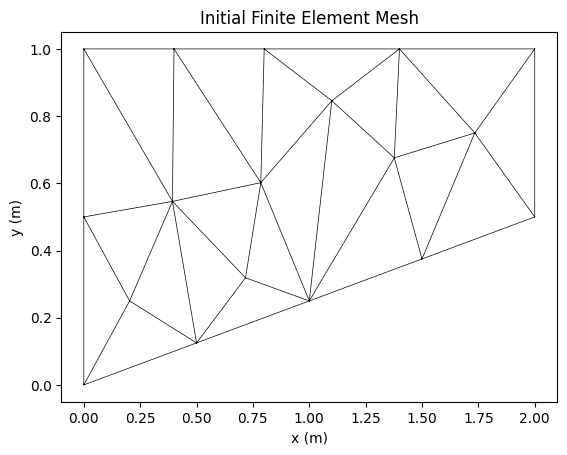

INFO: Initial global error = 3.115e-10
INFO: Iteration 0: Mean relative stress error = 1.102e+00, Elements = 23
INFO: Iteration 1: Mean relative stress error = 1.115e+00, Elements = 86
INFO: Iteration 2: Mean relative stress error = 1.131e+00, Elements = 302
INFO: Iteration 3: Mean relative stress error = 1.128e+00, Elements = 1020
INFO: Iteration 4: Mean relative stress error = 1.121e+00, Elements = 3080
INFO: Iteration 5: Mean relative stress error = 1.113e+00, Elements = 7599
INFO: Iteration 6: Mean relative stress error = 1.117e+00, Elements = 14927
INFO: Iteration 7: Mean relative stress error = 1.116e+00, Elements = 16474
INFO: Iteration 8: Mean relative stress error = 1.115e+00, Elements = 16486
INFO: Iteration 9: Mean relative stress error = 1.115e+00, Elements = 16486
INFO: Iteration 10: Mean relative stress error = 1.115e+00, Elements = 16486
INFO: Iteration 11: Mean relative stress error = 1.115e+00, Elements = 16486
INFO: Mesh refinement has stagnated. Halting further refin

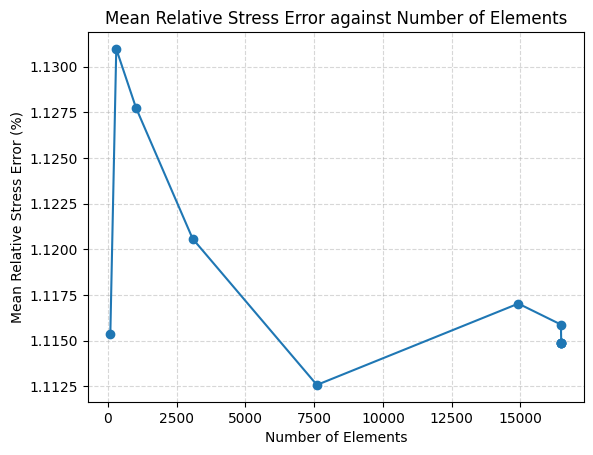

In [12]:
# Run the finite element analysis
fe_solver.run_analysis(ref_max_volume=4e-5, tol_stress=0.01, max_iterations=20)

fe_solver.plot_convergence()

## **Convergence Behaviour**

#### ** Relative Stress Error**

The solver’s convergence history is summarised by a plot of mean relative stress error (%) against the number of elements in the mesh. Initially, as the mesh refines, the mean relative stress error does not decrease monotonically as the mesh is refined. Instead, the error initially drops, indicating the adaptive refinement is successfully identifying the key regions requiring refinement. However, after a certain mesh size is reached, the  error begins to rise, before settling around 1.1%. This indicates that, after a certain point, the addition of new elements does not yield the expected decrease in mean absolute error, suggesting diminishing returns above a certain element count. This non-monotonic convergence is notable, with several possible causes behind this observed behaviour.

One possible cause is the saturation of the error metric. Since a global mean stress error is used in the code, it is possible that after some refinement, the remaining differences between current and reference solutions are very localised or not captured well by a global average. If, for example, the remaining error is concentrated in a small corner of the domain, the global mean might hardly change even if that corner’s accuracy improves. The plateau could indicate the metric has become insensitive to further local improvements. This hinders the refinement of small regions that could still benefit from the use of smaller elements. The choice of error metric is thus critical; a more local or different norm (max error, specific stress component error, etc.) might drive further refinements where needed.

Alternatively, the coarse solution may approximate the reference solution adequately across most areas. This prevents the adaptive refinement routine from effectively targeting regions for further refinement, The large discrepancy between the 16,486 nodes present in the final output of the FEM routine and the 58,311 elements present in the reference solution hints at two possibilities. Either the adaptive refinement is exceptionally good at identifying discrepancies and refining the mesh appropriately or, more likely, the current solution matches the reference well in most areas, leading to highly-localised regions of high error. The global mean error of 1.1% hints at this case, although cannot be used to identify the location of these high error regions. 

The significant increase in number of elements over a short number of refinement iterations while maintaining similar error values suggests that the domain is being subdivided quite aggressively, but that these subdivisions do not appreciably alter the computed stress field in ways that would reduce the global error metric. This could be due to an error in the logic used to flag elements for refinement; the error tolerance being too tight causing regions to be erroneously flagged for adaptive refinement. Hence, computational effort was 'wasted' for minimal improvement, indicating the lack of precision in the refinement implementation. This is a methodological weakness: an effective adaptive scheme should ideally refine the few most error-critical elements first, not just a broad swath that meets a loose criterion. If too many elements are refined at once, the mesh density increases without a proportionate drop in error.

The code logs that it stopped refining because the mesh “has stagnated”. This typically means an iteration occurred where no new points were added (perhaps no element exceeded the error tolerance) or that the relative improvement in error was below some threshold. It’s good that the code can terminate automatically – it prevents endless refinement – but given the plateau, we should question if stagnation was reached prematurely. Perhaps a lower error tolerance (say 0.5% instead of 1%) or a different error norm could push one or two more refinement steps focused on the last remaining high-error zone. The trade-off is that chasing very low errors can lead to over-refinement and high computational cost for little gain. In this case, stopping at ~1% might be a pragmatic choice, but a real-world situation may require investigating why it did not go lower.

In summary, the convergence behaviour demonstrates that the code works to reduce error significantly with adaptive refinement, but also highlights a limitation: the chosen error indicator and strategy lead to an early plateau. From an overall judgement perspective, the code is partially successful in that it achieves a good error reduction with far fewer elements than a uniformly fine mesh (16k vs 58k is a big improvement in efficiency). However, the fact that error does not continue decreasing suggests the adaptive algorithm might not be fully optimised or general; it succeeded up to a point and then hit a methodological wall. This is an area where further refinement (algorithmic, not mesh) could improve the code’s effectiveness: for instance, using a combination of error metrics (both stress and displacement error) or refining more gradually could ensure more monotonic convergence.

#### **RMSE Displacement Error**

The figure below depicts the relationship between the mean area of the elements present within the mesh and the RMSE displacement between the reference solution and the coarse solution. Generally, one would expect a decrease in the RMSE displacement error as the element size decreases. Indeed, the data suggest a general downward trend, indicating that the mesh refinement is broadly improving the solution quality. 

However, much like the displacement error analysis, the non-monotonic fluctuations observed in the plot underscore the complexities of localised refinement and the particular error indicator used. Specifically, abrupt changes in the curve can arise from areas of the domain that require more targeted mesh refinement, such as regions of high stress concentration or boundary-condition transitions. When these regions are not consistently refined, or if the chosen error measure does not fully capture the localised nature of the solution, the global error metric can exhibit fluctuations even as the mean element size decreases.

This behaviour highlights the possibility that an alternative or more comprehensive refinement strategy might be necessary to achieve smoother convergence. In particular, combining different error indicators (e.g. displacement-, stress-, and strain-based metrics) or adopting a localised a posteriori estimator could ensure that high-gradient regions receive adequate refinement. Such an approach would help the error converge more predictably as the mesh is refined, reflecting the true limiting behaviour of the solution.

Ultimately, while the current trend generally aligns with theoretical expectations that smaller elements yield greater accuracy, these deviations from monotonicity indicate that the solver’s adaptive algorithm or the error criterion might require further tuning. By refining both the mesh and the chosen error metrics, one can more reliably capture the underlying physics of the problem and achieve a smoother convergence towards the correct solution.

In [ ]:
fe_solver.plot_displacement_error_vs_area()

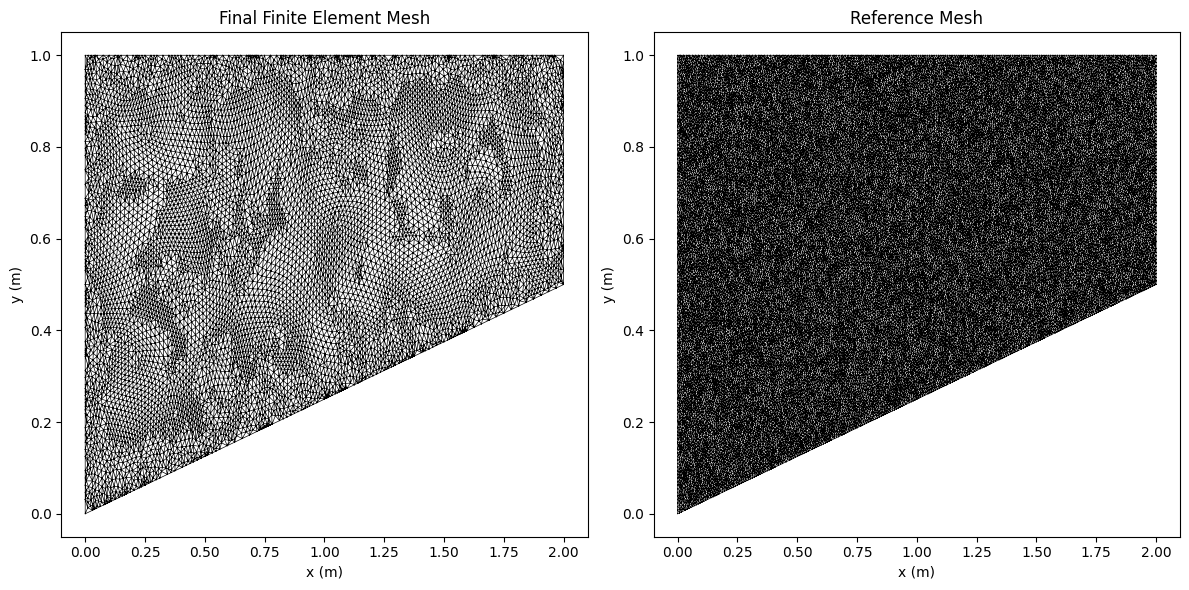

In [13]:
fe_solver.plot_mesh_comparison()

### **Final vs Reference Mesh Comparison**

To visualise what the adaptive process achieved, the final mesh produced by the code is compared to the ultra-fine reference mesh. The final mesh , the left panel in the figure above, has about 16,486 elements, whereas the reference mesh, displayed in the right panel, has 58,311 elements. The reference mesh is nearly uniformly fine across the domain – essentially overkill everywhere to serve as a near-exact solution. In contrast, the final adaptive mesh is much coarser in many regions, with fine subdivisions only in select areas. The coarser nature of the final plot is indicative of the adaptive refinement algorithm behaving roughly as expected. For example, one might see coarser triangles in regions where the solution is smooth and fine triangles clustered near boundaries or wherever high stress gradients occur. The coarseness of the final solution suggests that many areas of the domain were not error-critical. 

Conversely, the relative homogeneity in element sizes throughout the domain further reinforce the possibility of a non-optimal refinement methodology. This may be indicative of a lack of fidelity in the final solution; the code’s apparent success in reducing the model size significantly while keeping error low on average may be hiding the ineffective capturing of the non-stress fields.

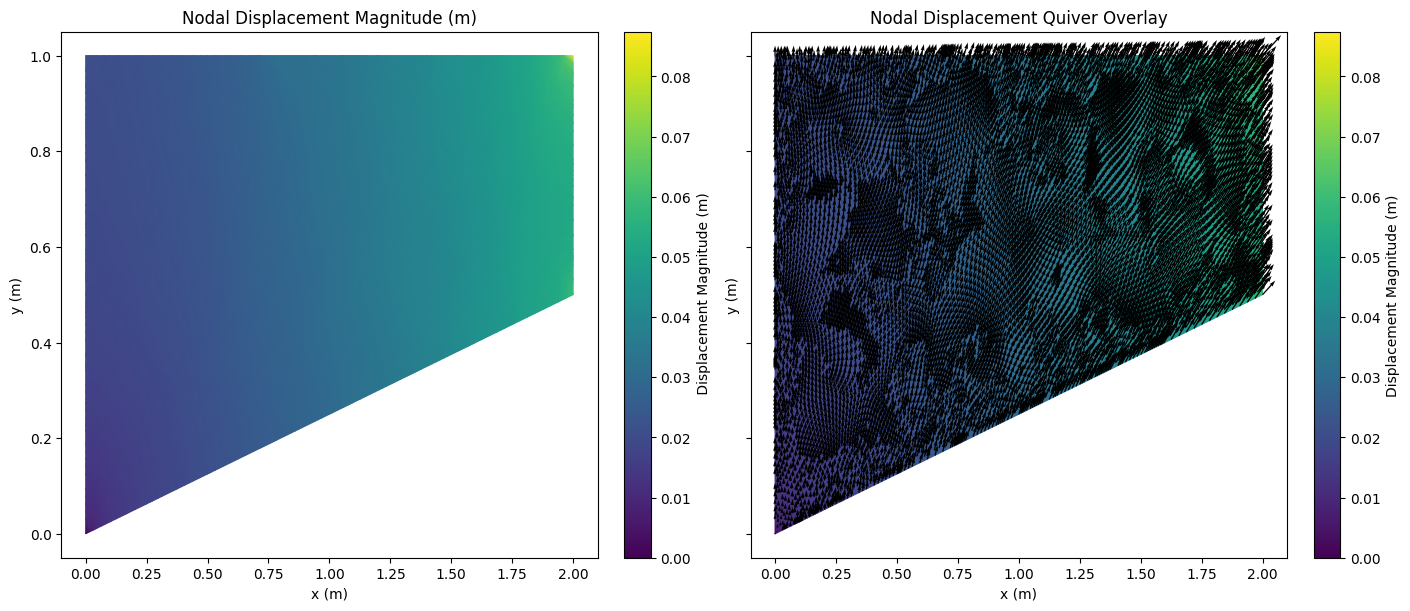

In [15]:
fe_solver.plot_displacement_combined()

### **Displacement Field Visualisation**

Two primary visualisations were produced for the displacement: a colour map of displacement magnitude (left panel), and a quiver plot of displacement vectors overlaid on the magnitude field (right panel). These provide a visual confirmation of the correct implementation of boundary conditions and that overall deformation patterns are sensible. The figure is available above.

#### **Displacement Magnitude**

The left panel depicts a continuous colour map of displacement magnitude across the undeformed trapezoidal domain. The scale ranges from low (blue) to high (green/yellow) values, and provides a easy way to identify anomalies within the displacement field. Near the leftmost boundary $\Gamma_D$ displacements are near zero, as one would expect from the Dirichlet condition imposed at the left edge. Conversely, the rightmost edge exhibits large displacements consistent with the prescribed von Neumann conditions. The color gradient, representing the displacement gradient, is smooth.  The lack of discontinuities in the colormap is indicative of a stable and physically reasonable numerical solution. Hence, the finite element code is likely capturing a realistic deformation shape.

#### **Displacement Quiver Overlay (Right Image)**

On the right panel, the same domain is plotted with a quiver overlay of displacement vectors superimposed on a colour map of the nodal displacement magnitude. Each arrow’s direction indicates the displacement direction, and its length is scaled to reflect the relative magnitude of movement. Darker tones correspond to lower displacement magnitudes, whereas brighter colours highlight regions of greater displacement. This overlay is especially informative for identifying areas of strong directional change—for example, near corners or along edges with high traction. By inspecting arrow orientations, one can confirm that boundary conditions (fixed or traction-applied) are implemented correctly. The clear reduction in magnitude around the left domain boundary and net northwestern directionality of the arrows indicate the structure is stretching rightward (due to the horizontal traction on the right edge) and upward (due to the upward component of $\mathbf{t}_1$ on the top edge). This matches the boundary conditions: the top edge load $\mathbf{t}_1$ has a large upward component, so nodes under that load should move upward; the right edge load $\mathbf{t}_2$ pushes outward, so nodes on the right should move rightward.

Near corners or where the two tractions meet (like the node at $(2,1)$ where top and right edges intersect), arrows show the expected effect, indicating the successful handling of transitions at boundaries:
    * Along $\Gamma_D$ (left edge): arrows are zero, confirming the Dirichlet BC.
	* Along $\Gamma_{\mathbf{t}_2}$ (right edge): arrows likely point roughly horizontal (to the right), consistent with the $(1900,0)$ kPa traction.
	* Along $\Gamma_{\mathbf{t}_1}$ (top edge from $x=0.8$ to $2$): arrows point upward (and maybe slightly right if the material near the top-right corner is dragged outward by the right edge load as well). This matches the $(146, 260)$ kPa traction which has an upward component.
	* On free edges (bottom and part of top from $x=0$ to $0.8$): arrows should align with whatever the interior solution dictates, but there’s no external force directly there – presumably they smoothly transition to zero at the fixed end. 

Taken together, these plots provide evidence that the finite element code is functioning correctly. The displacement field transitions smoothly from the fixed boundary (where displacements are zero) to the traction boundaries (where displacements reach their maximum). The quiver arrows show displacements in directions consistent with the boundary and loading conditions, while the colour map offers a direct comparison of the relative magnitudes across the domain. Overall, this visualisation confirms that the solver captures both the global and local aspects of the deformation, and that the adaptive refinement strategy is enabling a detailed resolution of the displacement field in critical areas. However, this technique is purely qualitative. The physical plausibility of the code is not quantitatively assessed, and thus the field could still be incorrect. 

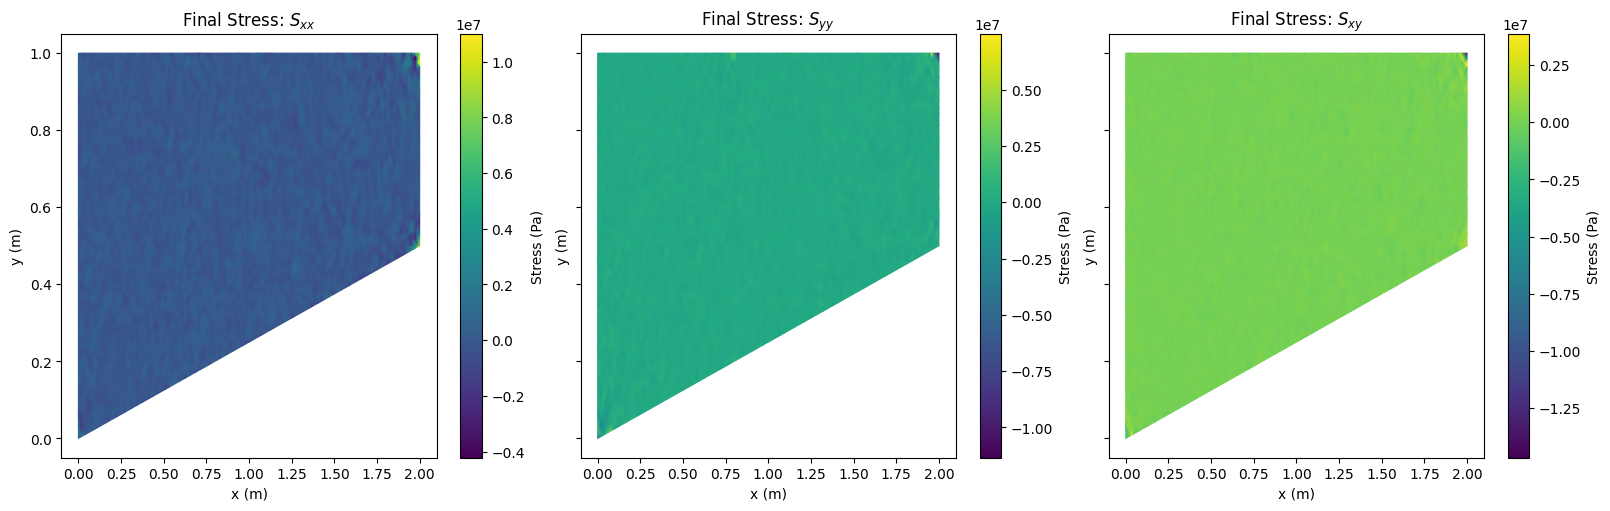

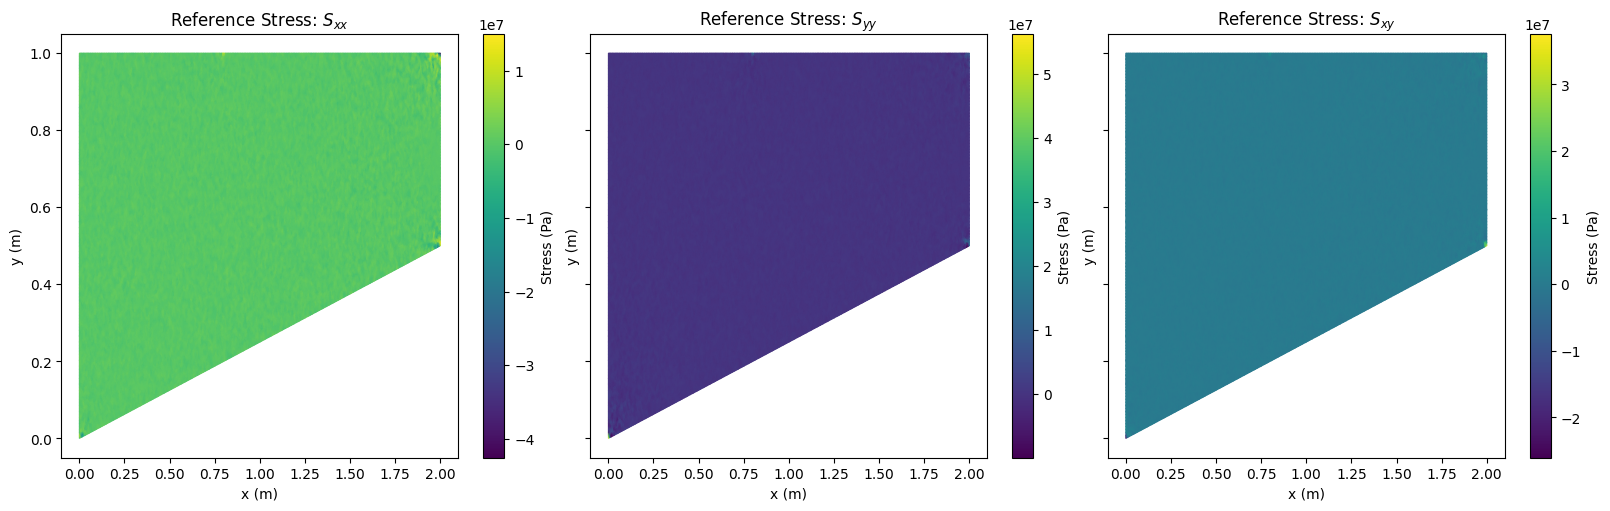

In [ ]:
fe_solver.plot_stress_field()
fe_solver.plot_stress_field_ref()

#### ** Stress Fields**

Above are two sets of three-panel plots showing the computed stresses for the final finite element solution (top image) and for the reference solution (bottom image). In each set, the left panel shows the S_{xx} component of stress, the middle panel shows S_{yy}, and the right panel shows S_{xy}. The colours indicate the magnitude of the respective stress component in Pascals (Pa), with each subplot having its own colour bar scale. These plots allow us to examine how well the coarse (final) solution captured the stress distribution compared to a very fine solution.

###### **Coarse Grid**

Focusing on the $S_{xx}$ field first (left panel), one notes the influence of the horizontal tractions applied along the upper and right edges. it is likely that $S_{xx}$ is tensile on the right side and possibly varying along the height, although the presence of the high stresses at the upper-right node makes such a visual inspection difficult.  Meanwhile, $S_{yy}$ (centre panel) appears to be slightly more uniform but still shows a gradient between the lower and  upper regions of the domain. In both the $S_{xx}$ and $S_{yy}$ fields, a noticeable stress is present at the pinned node, as well as the two nodes subject to the traction boundary conditions, and about the left end of the traction $\mathbf{t}_1$. The $S_{xy}$ component (right panel) indicates the shear stress distribution, which tends to be largest around areas of higher stress gradients and near boundaries where the applied tractions or geometric constraints induce shear.

In contrast, the reference (fine) solution (bottom set of three images) shows the same overall patterns for each stress component but in a smoother and more refined manner. For instance, the $S_{xx}$ field (left panel) transitions more gradually and has fewer abrupt changes in colour, reflecting the higher mesh resolution and more precise capture of the stress distribution. Similarly, the $S_{yy}$ (centre panel) also appears more uniform in its transitions when compared to the $S_{xx}$ field. The $S_{xy}$ (right panel) appears to lack the same detail in the shear distribution near edges and corners. Across all three stress components the underlying inhomogeneities in the stress field appear to line up, suggesting that the final model and the reference solution are capturing the same underlying system. The fine reference solution provides a more accurate and continuous representation of the stress fields, with fewer apparent discontinuities or artificial oscillations. These plots illustrate how refining the mesh and capturing more elements in critical regions leads to a smoother and more physically realistic stress distribution.

#### ** Strain Fields**

Focusing on the plots below, the code depicts three separate strain components: $\varepsilon_{xx}$, $\varepsilon_{yy}$, and $\varepsilon_{xy}$. Each panel is rendered with its own colour scale, allowing a direct comparison of how the material deforms in the x-direction, y-direction, and through in-plane shear. Because the problem involves tractions applied along certain edges and constraints along others, these strain fields help us visualise how the domain is stretching or compressing, and how angles within the material may be changing.

Comparing the $\varepsilon_{xx}$ subplots first, one notices the similarity in the overall gradients. In the final output, the horizontal strain is lower near the constrained left boundary and increases toward the right where traction is applied. The reference field, obtained from a much finer mesh, reveals the same trend but with more detailed local variations. This consistency indicates that the final mesh captures the dominant horizontal deformation behaviour correctly, although it may smooth over some finer details that the reference solution resolves. Overall, the horizontal strain distribution aligns well with the expected response of a domain subject to a fixed left edge and horizontal loading on the right.

The vertical strain fields in both solutions show similar patterns: higher tensile strain near the top boundary where an upward traction is applied, and lower or even slightly compressive strains closer to the constrained regions. The final output successfully reproduces the general trend observed in the reference field, which features smoother transitions and sharper contours due to its finer resolution. This agreement suggests that the vertical deformation is modelled accurately and is consistent with the prescribed boundary conditions. The subtle differences in the detail of the strain contours are expected given the coarser discretisation in the final mesh, but the overall physics remain well captured.

The in-plane shear strain is critical for understanding angular distortion in the material. Both the final and reference solutions exhibit elevated shear strain in areas where there are abrupt changes in boundary conditions, such as corners or transitions between fixed and loaded edges. While the reference field provides a more refined picture of localised shear variations, the final solution still reflects the correct overall distribution of shear. The consistency between these fields reinforces that the FEM model is correctly capturing the shear behaviour, which is crucial given that shear deformations are highly sensitive to both the applied tractions and the mesh quality.

Taken together, the comparisons indicate that the final FEM output is consistent with the reference fields in terms of the major trends and qualitative features. The strain distributions in both cases conform to the expected physical behaviour of the problem; regions of tensile and compressive strains occur as one would expect in response to the specific traction and constraint conditions. Although the final solution is less detailed than the reference due to the adaptive mesh’s coarser nature in non-critical regions, the key deformation characteristics are accurately represented. This consistency validates both the adaptive refinement strategy and the overall numerical implementation, confirming that the solution is a credible representation of the expected material response under the given loading and boundary conditions.

However, both the stress and strain fields suffer from the same lack of rigour as the displacement field visualisation, requiring a further refinement to how the adaptive meshing strategy is validated. While the overall patterns of stress and strain are broadly consistent with the expected physical behaviour, there remain localised discrepancies, particularly in regions with abrupt boundary transitions, that suggest the current mesh resolution is insufficient to capture all the critical gradients accurately. For instance, the peak stress concentrations and subtle strain gradients near the fixed and loaded boundaries appear somewhat smeared, indicating that additional refinement, or perhaps an improved error estimator that considers both displacement and stress, may be necessary. This further refinement would help to resolve these nuances more robustly, ensuring that the numerical solution fully converges to a faithful representation of the underlying problem.

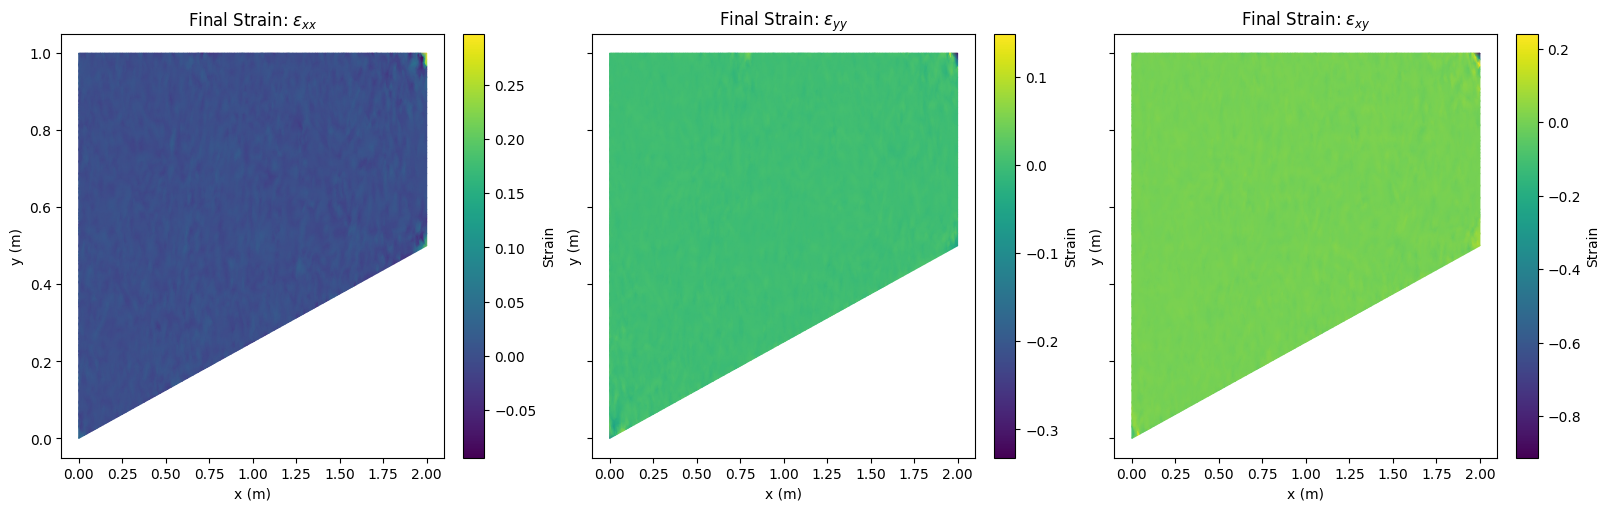

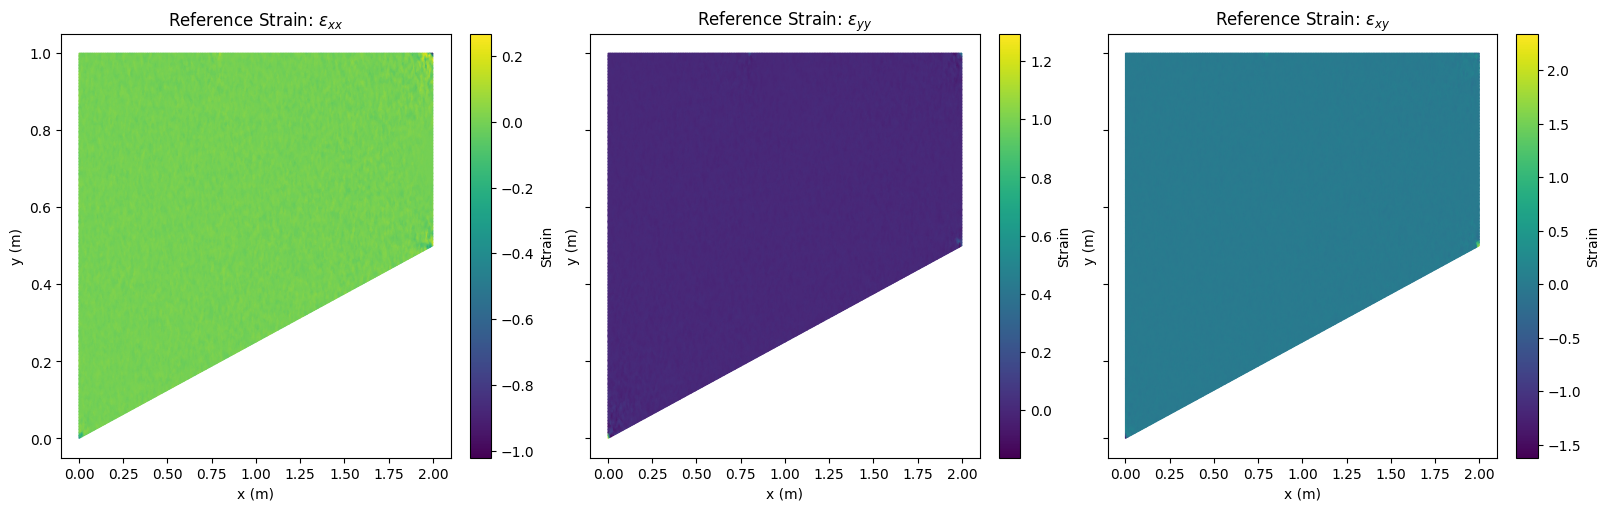

In [ ]:
fe_solver.plot_strain_field()
fe_solver.plot_strain_field_ref()

## **Summary & Concluding Remarks**

In conclusion, the finite element implementation captures the expected physics of a 2D linear elasticity problem, where regions subject to traction exhibit increased displacements, stresses, and strains, while the constrained edges display minimal deformation. Comparisons between the final mesh solution and a much finer reference solution show broadly similar fields, suggesting the solver successfully reproduces the dominant features of the true solution. The code employs an adaptive strategy based on a relative stress error between a coarse solution and a reference solution. This approach effectively refines the mesh where high-gradient phenomena appear, reducing the overall error without excessively increasing the global element count. In many cases, the final solution closely aligns with the reference solution’s contours, reinforcing the solver’s validity. Plots of error (displacement, stress, or strain) against mean element area indicate that, overall, reducing element size improves the solution accuracy. Although non-monotonic behaviour appears in some of the convergence data, the general downward trend in error supports the conclusion that the solution is converging towards the true physics.

#### **Methodological Flaws**

However, there are several critiques of the workflow I implemented here. Since the  current adaptive process relies heavily on a single global stress metric compared against a reference solution, the adaptive refinement scheme can occasionally miss localised hotspots or boundary-layer effects if those do not significantly impact the global average. A more comprehensive set of error indicators (including displacement, stress, and strain) could yield a finer-grained view of accuracy. The observed non-monotonic behaviour in the error plots highlights potential limitations in the local refinement strategy. Mesh irregularities or abrupt changes in the geometry may cause uneven refinement, leading to temporary increases in the measured global error. This points to a need for more sophisticated local refinement criteria or an a posteriori error estimator that better captures local complexities.

While using an ultra-fine reference solution is effective in small or moderate-scale problems, it can be computationally expensive and may not scale well to larger or more complex domains. Exploring a posteriori error estimators like the Zienkiewicz–Zhu estimator or recovery-based methods could reduce the dependence on a precomputed reference and make the workflow more flexible. 

Although robust in handling Dirichlet and von Neumann boundary conditions, integration of more complex boundary conditions, like mixed boundary conditions or stress singularities, would provide stronger evidence of reliability. In real-world problems, corners, edges, or discontinuities in loading often generate complex stress concentrations that require careful mesh treatment.

#### **Potential Improvements**

1.	**Expanded Error Metrics;**
    Incorporating multiple error measures (displacement, stress, strain, and possibly energy norm errors) into the refinement criterion can ensure that critical features in each field receive adequate refinement, minimising the risk of local under-resolution.

2.	**More Advanced Local Refinement Algorithms:**
    Investigating adaptive refinement schemes that target only the most problematic elements at each iteration would help mitigate the risk of over-refinement. For instance, refining a small fraction of elements with the highest error can lead to a smoother convergence curve and more efficient use of computational resources.

3.	**Robust Convergence Testing:**
    Performing convergence studies that examine both global norms (e.g., L^2 or energy norms) and local maxima (peak stress/strain) will help verify that the refinement is consistently capturing local hotspots. These results can clarify whether the code converges uniformly across all critical regions.

4.	**Additional Validation Cases**
    Testing the solver on simpler or analytically solvable benchmark problems (e.g., a rectangular cantilever with a known analytical solution) can further validate the numerical implementation and highlight any residual errors or inconsistencies. The code below was attempting to address this but ended up causing issues with my laptop (VSCode would occasionally crash when running this for some reason.)

In [19]:
# Code to assess the effect of different reference maximum volumes on the convergence of the adaptive refinement.
# This code is commented out as it currently does not work as intended.

#ref_max_volumes = [1e-3, 5e-4, 1e-4, 5e-5, 1e-5, 5e-6]
#results = []

#for ref_vol in ref_max_volumes:
    
    # Create a new FiniteElement solver object
    #fe = FiniteElement(mesh_type="triangular")
    
    # Set the system parameters for your domain
    #fe._set_system_params(domain, E, nu, thickness, tractions=tractions, forces=None, init_vol=0.1)
    
    # Run the analysis with the chosen reference volume
    #fe.run_analysis(ref_max_volume=ref_vol, tol_stress=0.001, max_iterations=20)
    
    # Store  the entire error history and element counts from the adaptive refinement
    
    #run_data = {"ref_vol": ref_vol, "element_history": fe.num_element_history.copy(), "error_history": fe.error_history.copy(),
    #            "area_history": fe.area_history.copy(), "displacement_error": fe.disp_error_history.copy()}
    
    #results.append(run_data)
    

#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Left subplot: Stress error vs. #elements
#ax0 = axes[0]

#for run_data in results:
    
    #label = f"Reference Maximum Area={run_data['ref_vol']}"
    
    #num_elems = run_data["element_history"]
    #errors    = run_data["error_history"]
    #ax0.plot(num_elems[1:], errors[1:], marker='o', label=label)

#ax0.set_xlabel("Number of Elements")
#ax0.set_ylabel("Mean Relative Stress Error")
#ax0.set_title("Dependence of the Mean Relative Stress Error on the Number of Elements for Different Refinement Levels")
#ax0.grid(True, linestyle='--', alpha=0.5)
#ax0.legend()

# Right subplot: Displacement error vs. mean area
#ax1 = axes[1]
#for run_data in results:
    
    #label = f"Reference Maximum Area ={run_data['ref_vol']}"
    #area_hist = run_data["area_history"]
    #disp_err  = run_data["disp_error_history"]
    #ax1.plot(area_hist[1:], disp_err[1:], marker='o', label=label)

#ax1.set_xlabel("Mean Element Area")
#ax1.set_ylabel("RMSE Displacement Error")
#ax1.set_title("RMSE Displacement Error against Mean Element Area for Different Refinement Levels")
#ax1.grid(True, linestyle='--', alpha=0.5)
#ax1.legend()

#plt.tight_layout()
#plt.show()